In [1]:
age: Age of the patient (int).
sex: Gender of the patient; 1 for male, 0 for female (int).
cp: Chest pain type (int); 1: Typical angina, 2: Atypical angina, 3: Non-anginal pain, 4: Asymptomatic.
trestbps: Resting blood pressure (mm Hg) (int).
chol: Serum cholesterol level (mg/dl) (int).
fbs: Fasting blood sugar > 120 mg/dl; 1 if true, 0 if false (int).
restecg: Resting electrocardiographic results (int); 0: Normal, 1: ST-T wave abnormality, 2: Showing probable or definite left ventricular hypertrophy.
thalach: Maximum heart rate achieved (int).
exang: Exercise induced angina; 1 if yes, 0 if no (int).
oldpeak: Depression induced by exercise relative to rest (float).
slope: Slope of the peak exercise ST segment (int); 1: Upsloping, 2: Flat, 3: Downsloping.
ca: Number of major vessels colored by fluoroscopy (float).
thal: Thalassemia; 3: Normal, 6: Fixed defect, 7: Reversible defect (float).
num: Heart disease diagnosis (int); 0: No disease, 1-4: Disease present with increasing severity.
Derived Features:

age_group: Age category; '30s', '40s', '50s', '60s'.
cholesterol_level: Cholesterol level category; 'low', 'normal', 'high'.
bp_level: Blood pressure category; 'low', 'normal', 'high'.
risk_score: Calculated risk score using the formula: (\text{age} \times \text{chol} / 1000 + \text{trestbps} / 100).
symptom_severity: Severity of symptoms; calculated as (\text{cp} \times \text{oldpeak}).
log_chol: Logarithm of cholesterol level.
log_trestbps: Logarithm of resting blood pressure.
age_squared: Square of age.
chol_squared: Square of cholesterol level.
age_thalach_ratio: Ratio of maximum heart rate to age (plus 1 to avoid division by zero).
risk_factor: Risk factor calculated as (\text{cp} \times \text{oldpeak} \times \text{thal}).
missing_values: Count of missing values in 'ca' and 'thal'.
chol_trestbps_ratio: Ratio of cholesterol level to resting blood pressure.
log_thalach_chol: Logarithm of the product of maximum heart rate and cholesterol level.
symptom_zscore: Z-score of symptom severity.
avg_chol_by_age_group: Average cholesterol level for the age group.
thalach_chol_diff: Difference between maximum heart rate and cholesterol level.
symptom_severity_diff: Difference in symptom severity compared to the average for the age group.
age_chol_effect: Product of age and cholesterol level.
thalach_risk_effect: Product of maximum heart rate and risk score.
age_trestbps_effect: Product of age and resting blood pressure.
chol_risk_ratio: Ratio of cholesterol level to risk score.

SyntaxError: invalid syntax (3361764647.py, line 1)

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier


In [6]:
os.chdir('/Users/saitejagudidevini/Downloads')


In [7]:
df = pd.read_csv('Heart_disease.csv')

In [8]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,chol_trestbps_ratio,log_thalach_chol,symptom_zscore,avg_chol_by_age_group,thalach_chol_diff,symptom_severity_diff,age_chol_effect,thalach_risk_effect,age_trestbps_effect,chol_risk_ratio
0,63,1,1,145,233,1,2,150,0,2.3,...,1.595890,0.919704,-0.275764,260.024691,-83,-2.532099,14679,2419.350,9135,13.602662
1,67,1,4,160,286,0,2,108,1,1.5,...,1.776398,0.828936,0.568702,260.024691,-178,1.167901,19162,2242.296,10720,13.142174
2,67,1,4,120,229,0,2,129,1,2.6,...,1.892562,0.895083,1.572932,260.024691,-100,5.567901,15343,2134.047,8040,13.053640
3,37,1,3,130,250,0,0,187,0,3.5,...,1.908397,0.947695,1.595755,219.785714,-63,8.178571,9250,1972.850,4810,21.645022
4,41,0,2,130,204,0,2,172,0,1.4,...,1.557252,0.968116,-0.161647,235.847222,-32,0.783333,8364,1662.208,5330,19.129782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,...,2.378378,0.876449,-0.526822,235.847222,-132,-0.816667,11880,1713.360,4950,18.884120
299,68,1,4,144,193,1,0,141,0,3.4,...,1.331034,0.940767,2.303281,260.024691,-52,8.767901,13124,2053.524,9792,12.400411
300,57,1,4,130,131,0,0,115,1,1.2,...,1.000000,0.973537,0.294821,247.424000,-16,1.165600,7467,1008.205,7410,13.412512
301,57,0,2,130,236,0,2,174,0,0.0,...,1.801527,0.944537,-0.800702,247.424000,-62,-3.634400,13452,2566.848,7410,14.982224


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    303 non-null    int64  
 1   sex                    303 non-null    int64  
 2   cp                     303 non-null    int64  
 3   trestbps               303 non-null    int64  
 4   chol                   303 non-null    int64  
 5   fbs                    303 non-null    int64  
 6   restecg                303 non-null    int64  
 7   thalach                303 non-null    int64  
 8   exang                  303 non-null    int64  
 9   oldpeak                303 non-null    float64
 10  slope                  303 non-null    int64  
 11  ca                     299 non-null    float64
 12  thal                   301 non-null    float64
 13  num                    303 non-null    int64  
 14  age_group              302 non-null    object 
 15  choles

In [10]:
#Segregating numerical values
for col in df:
    num_cols = df.select_dtypes(include = ['int64', 'float64'])
    

    

#partinioning float64 and int64

for col in num_cols:
    float_64 = num_cols.select_dtypes(include = 'float64')

for col in num_cols:
    int_64 = num_cols.select_dtypes(include = 'int64')
    




In [11]:
#segregating Categorical Values
for col in df:
    obj_files = df.select_dtypes(include = 'object')
    
obj_files

,age_group,cholesterol_level,bp_level
0,60s,normal,high
1,60s,high,high
2,60s,normal,low
3,30s,high,normal
4,40s,normal,normal
...,...,...,...
298,40s,high,low
299,60s,low,high
300,50s,low,normal
301,50s,normal,normal


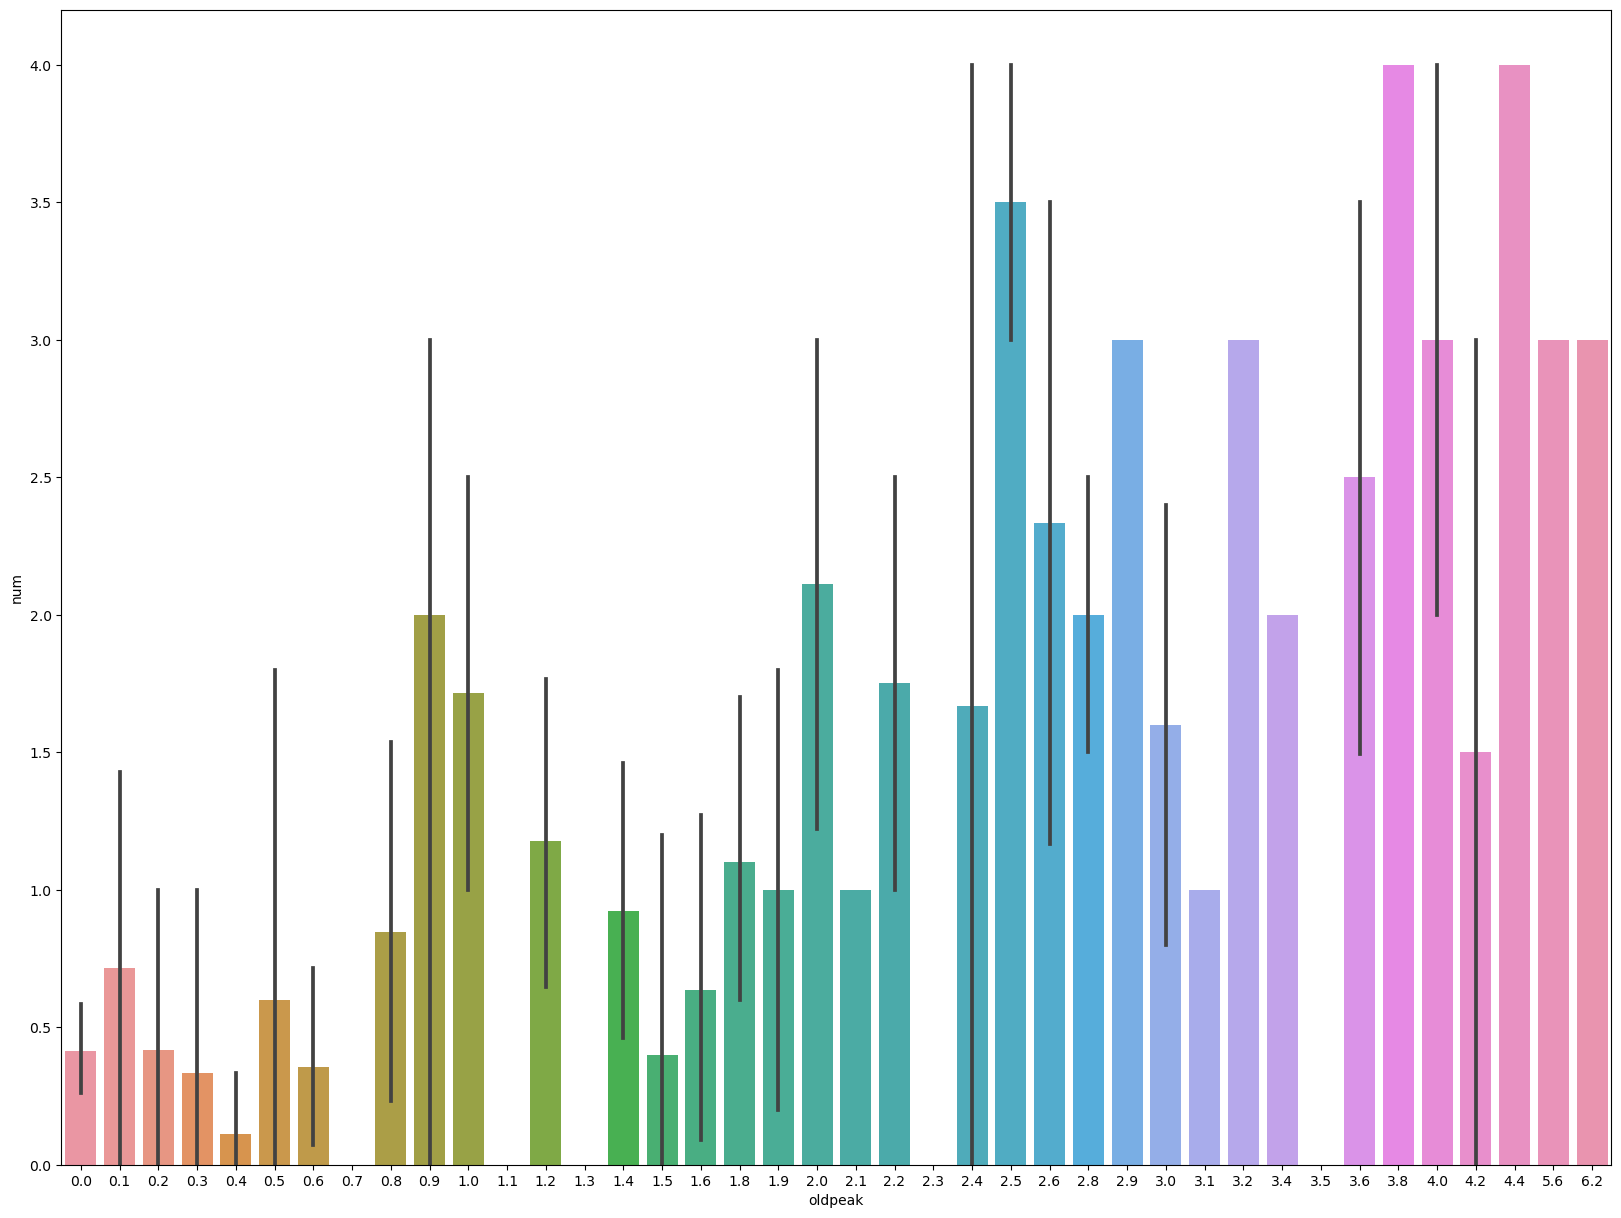

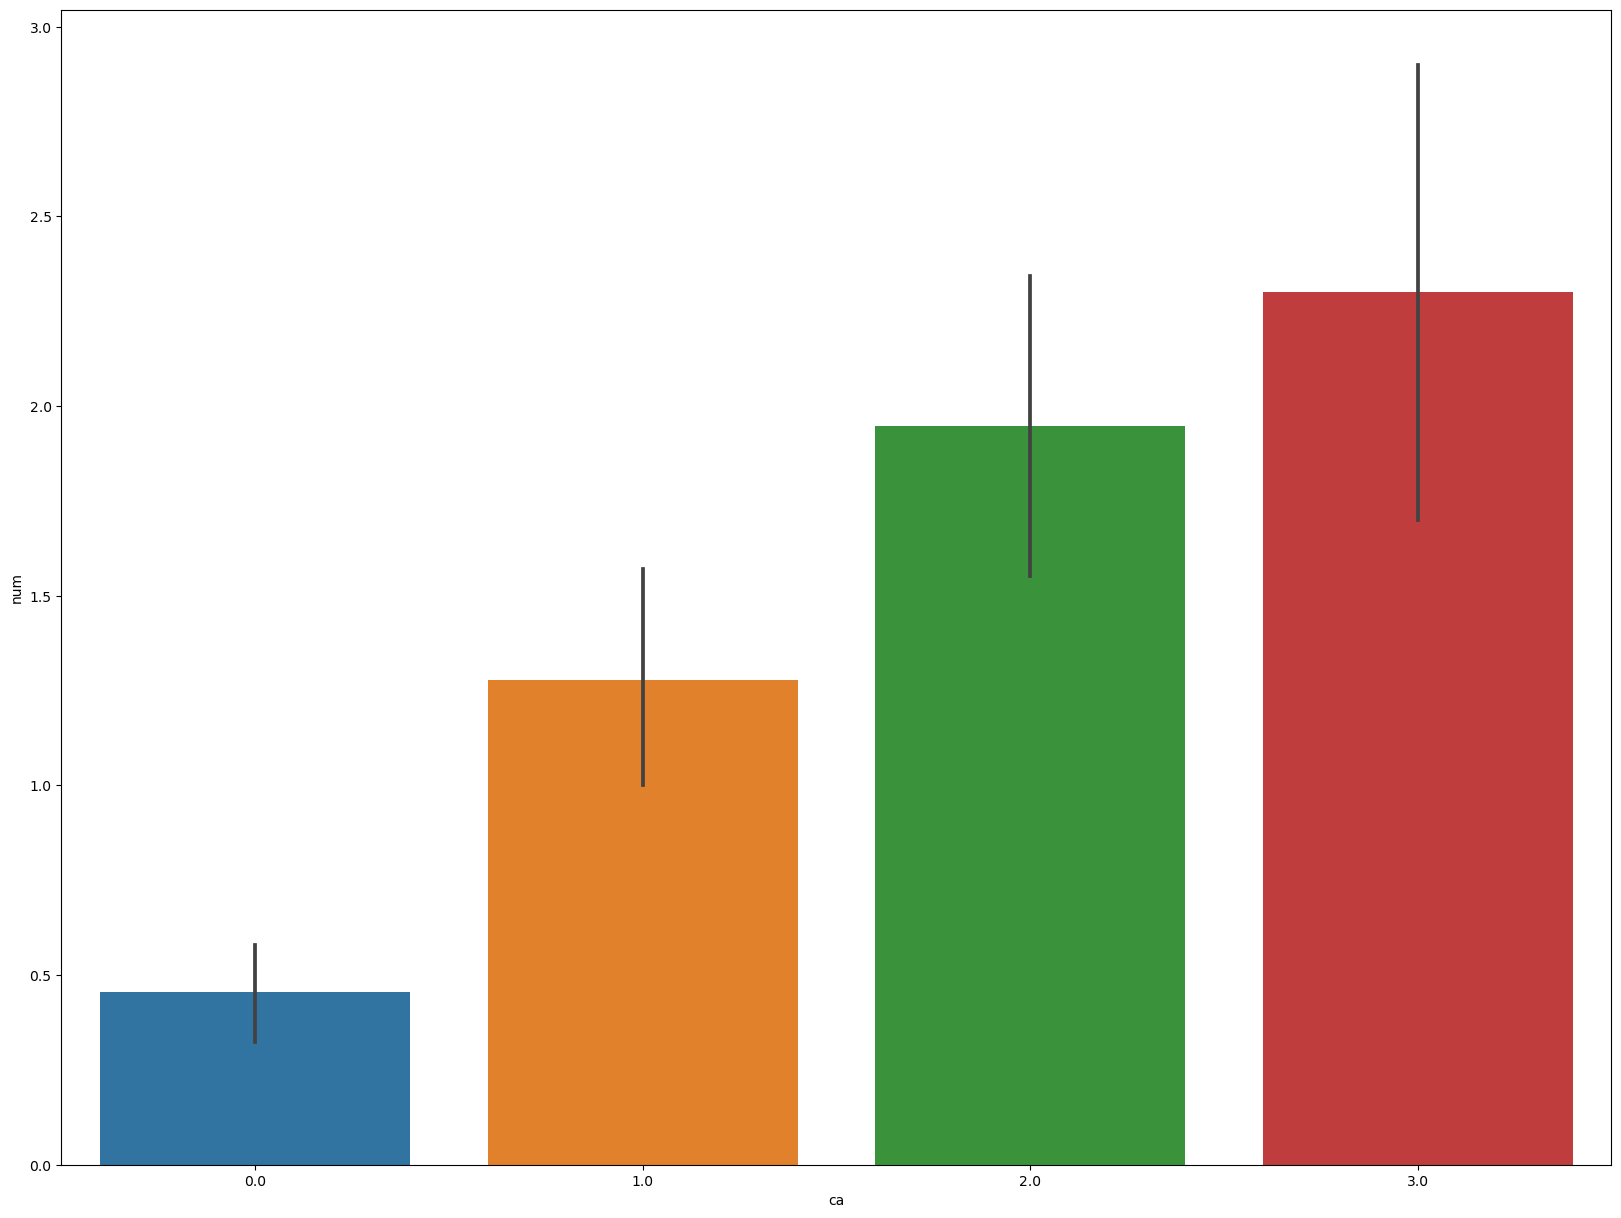

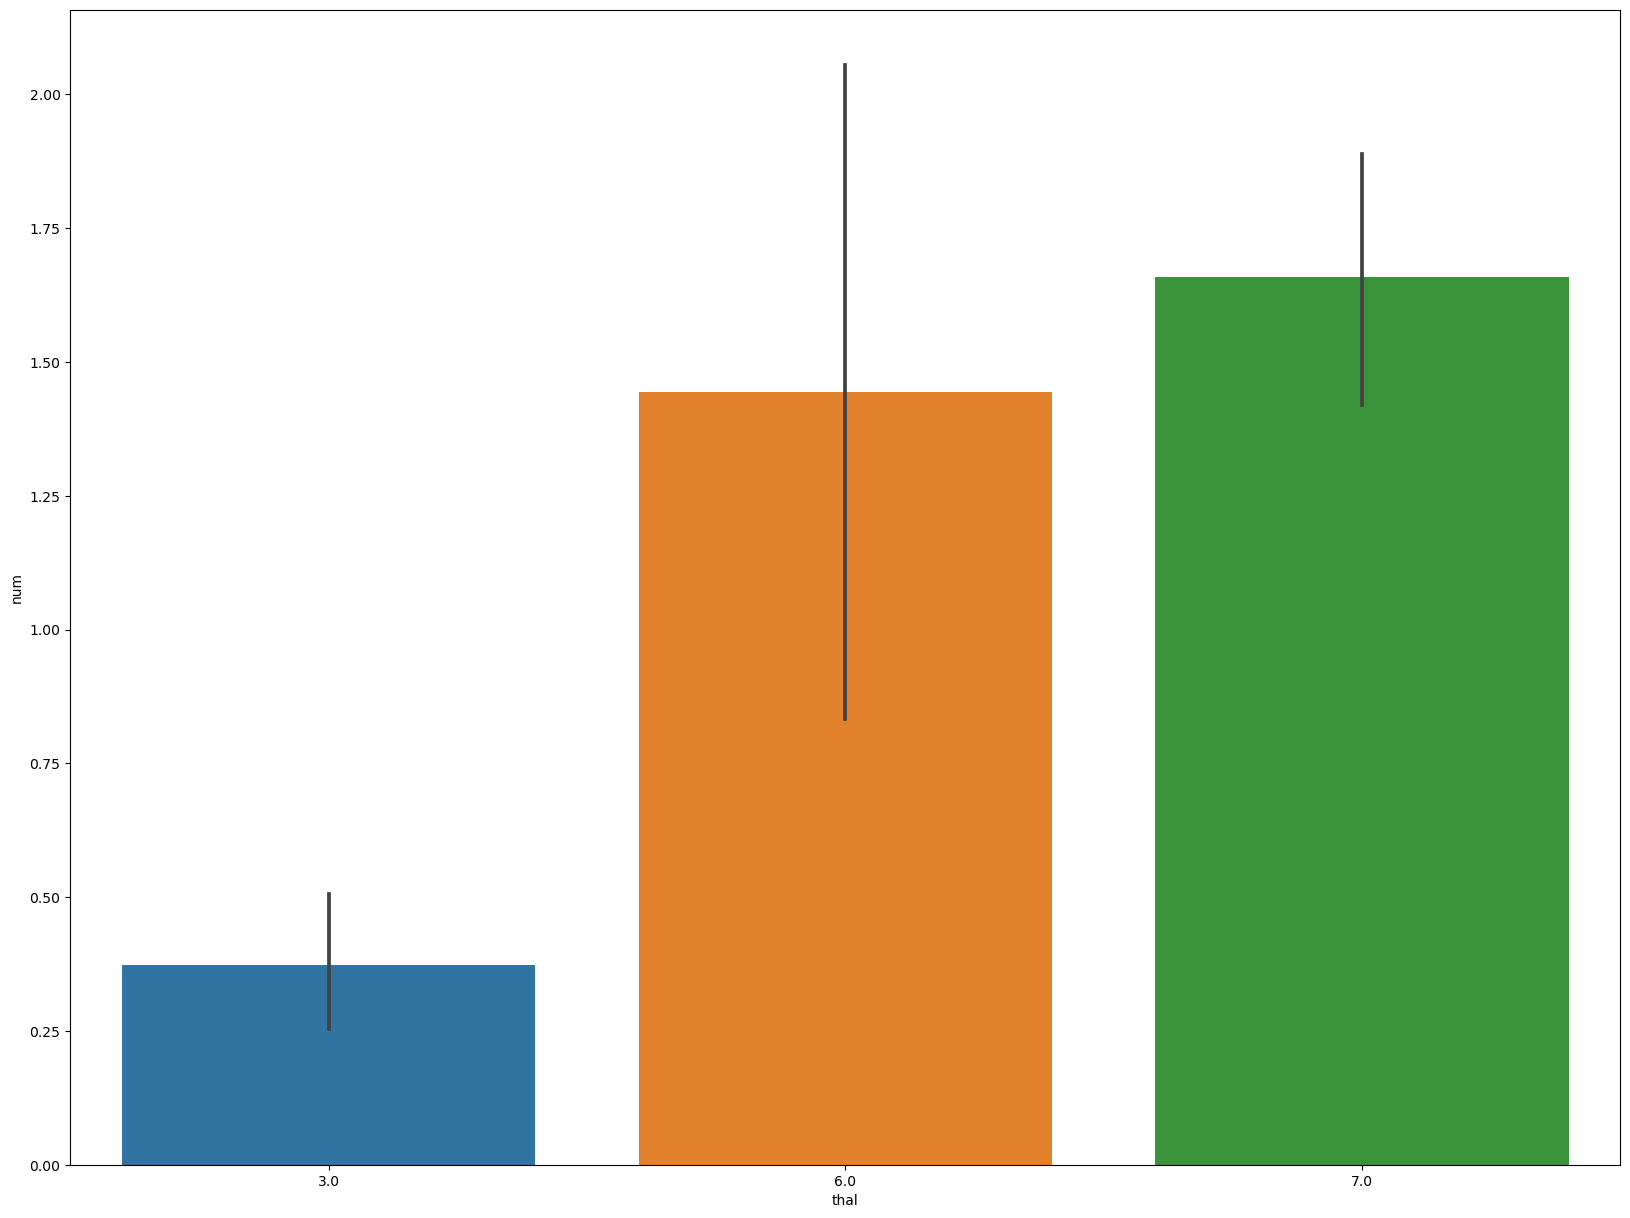

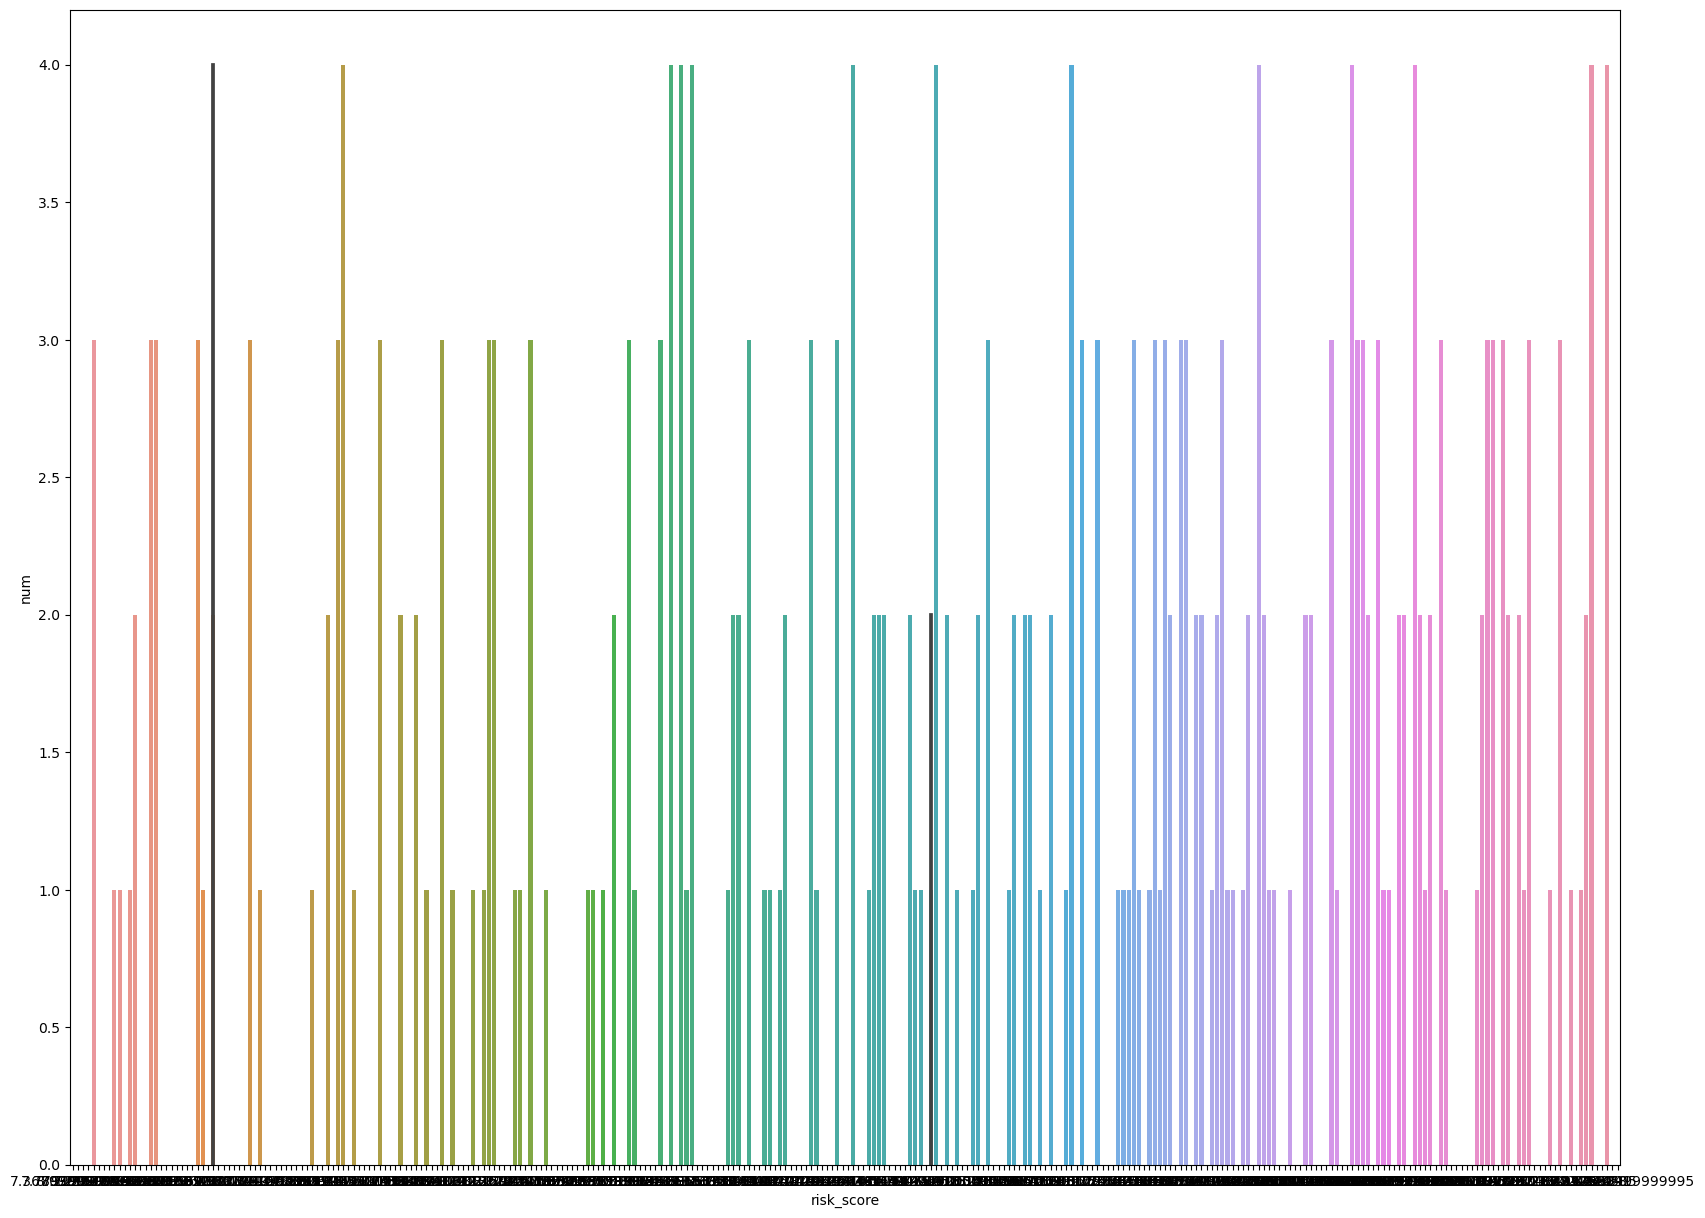

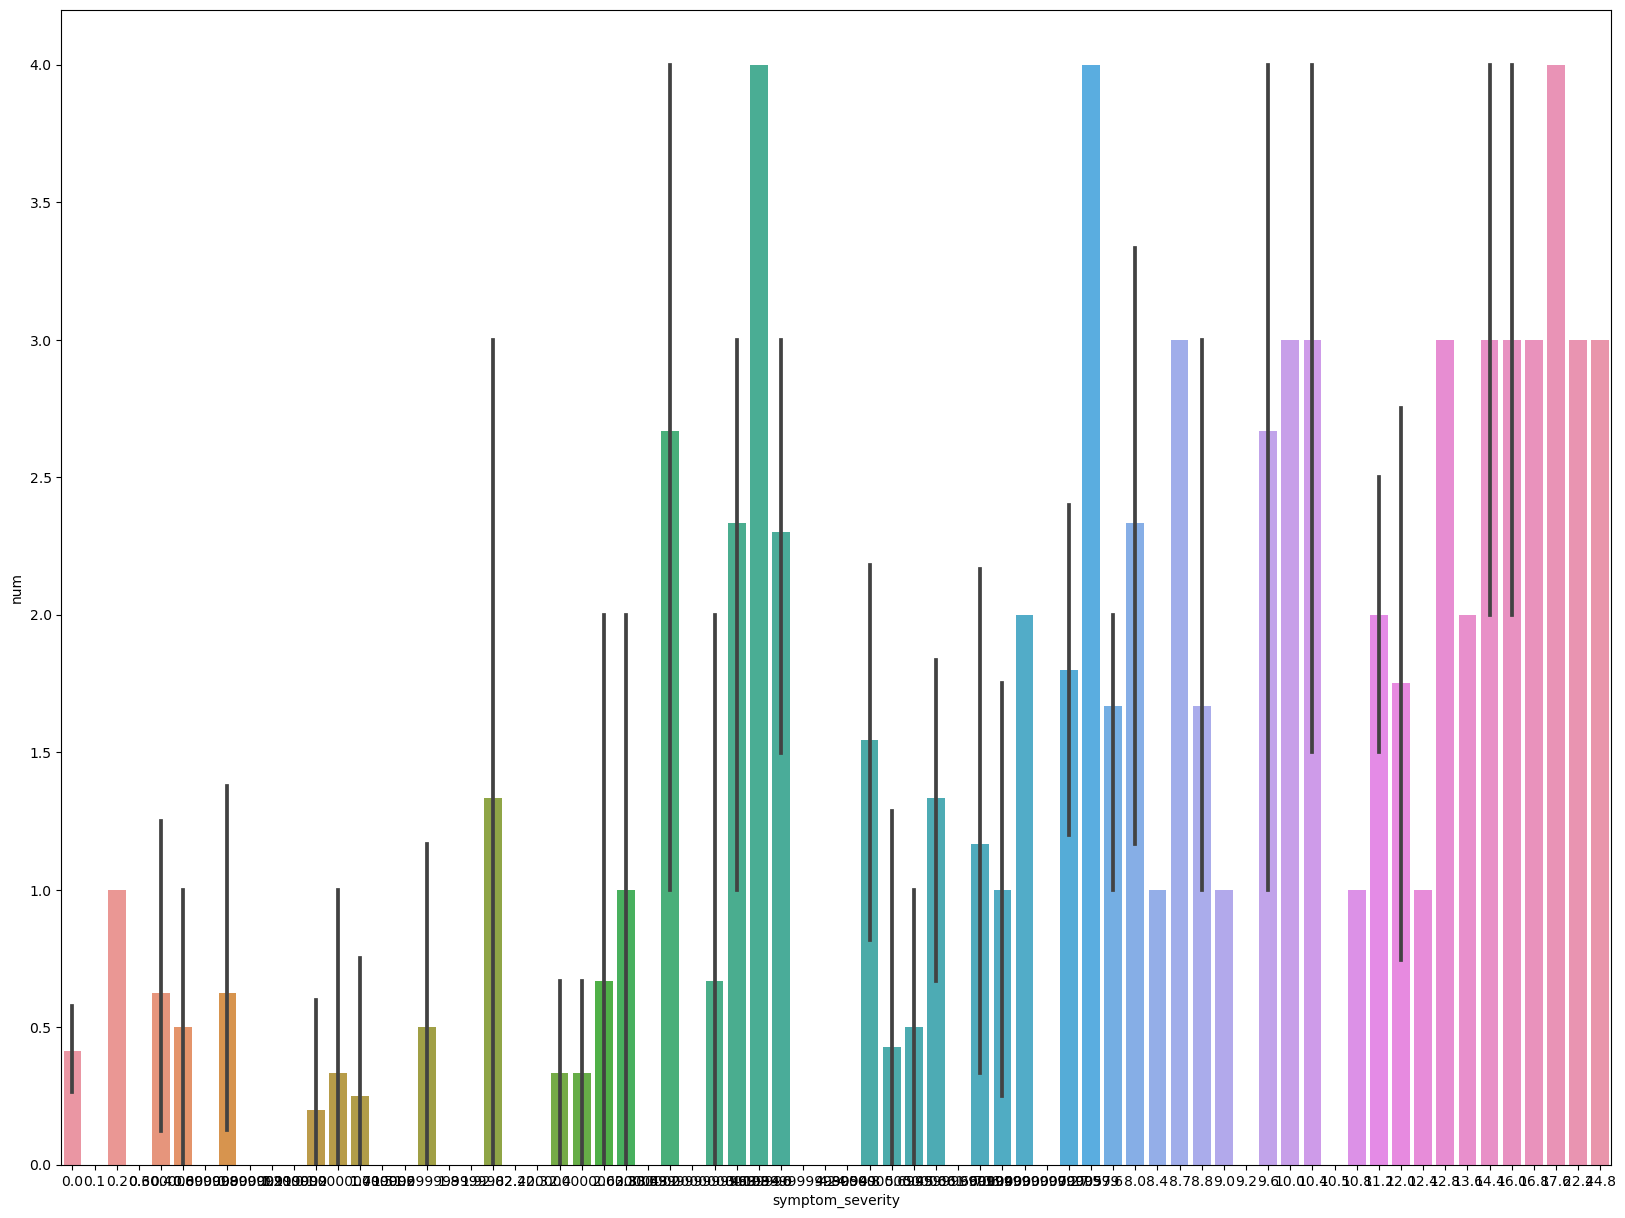

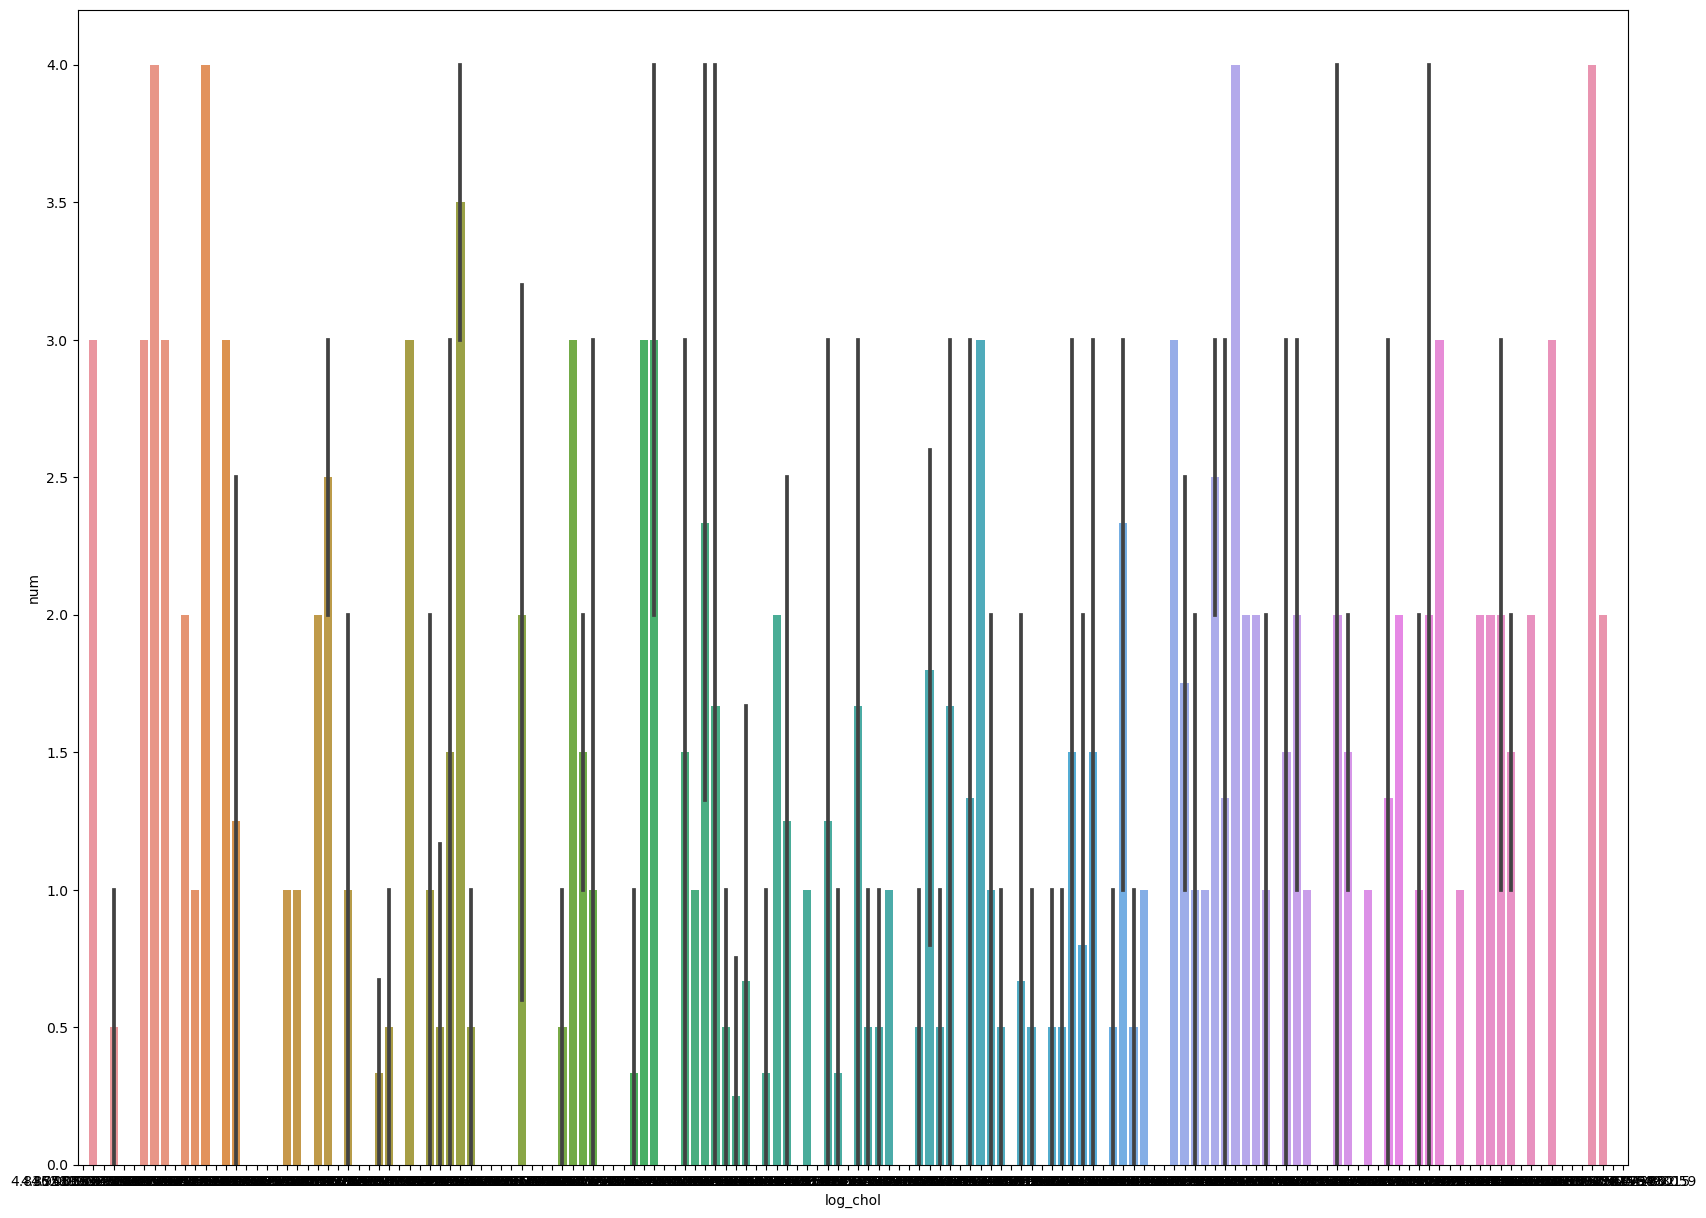

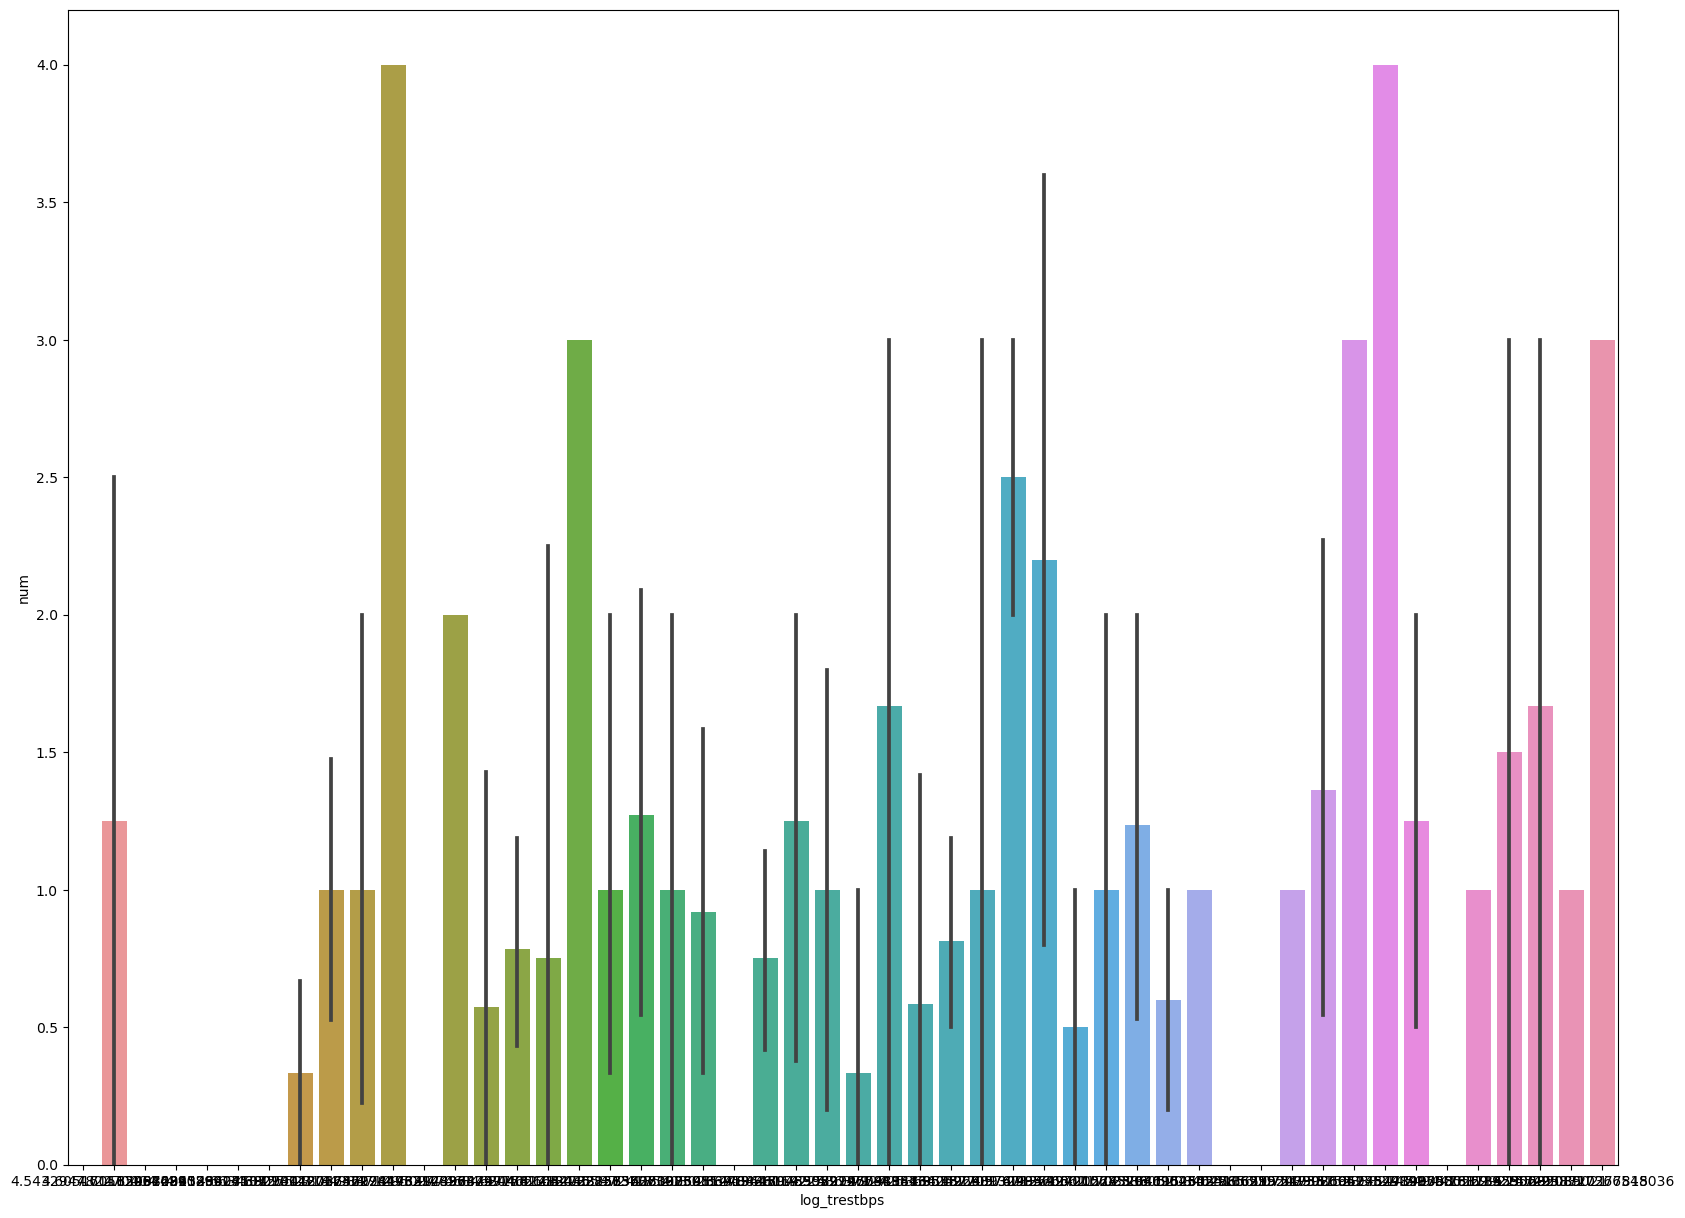

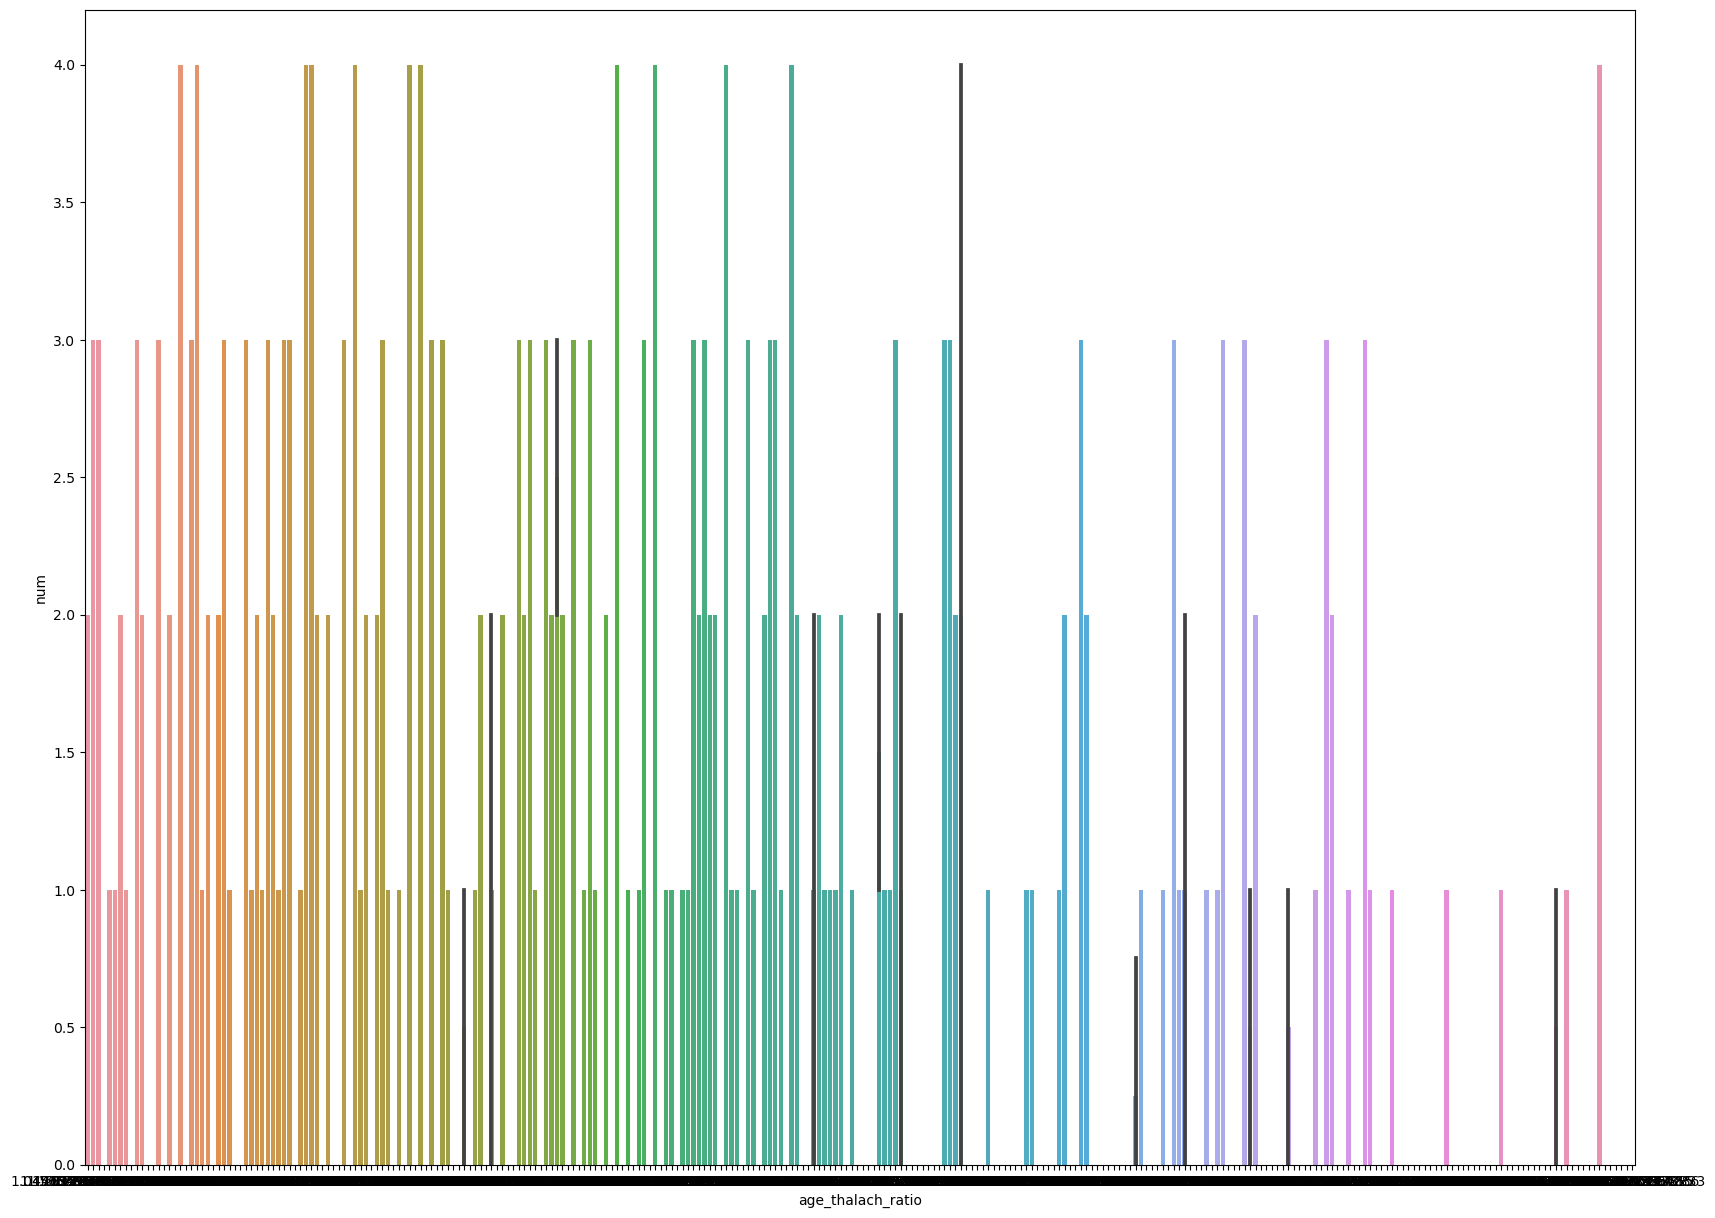

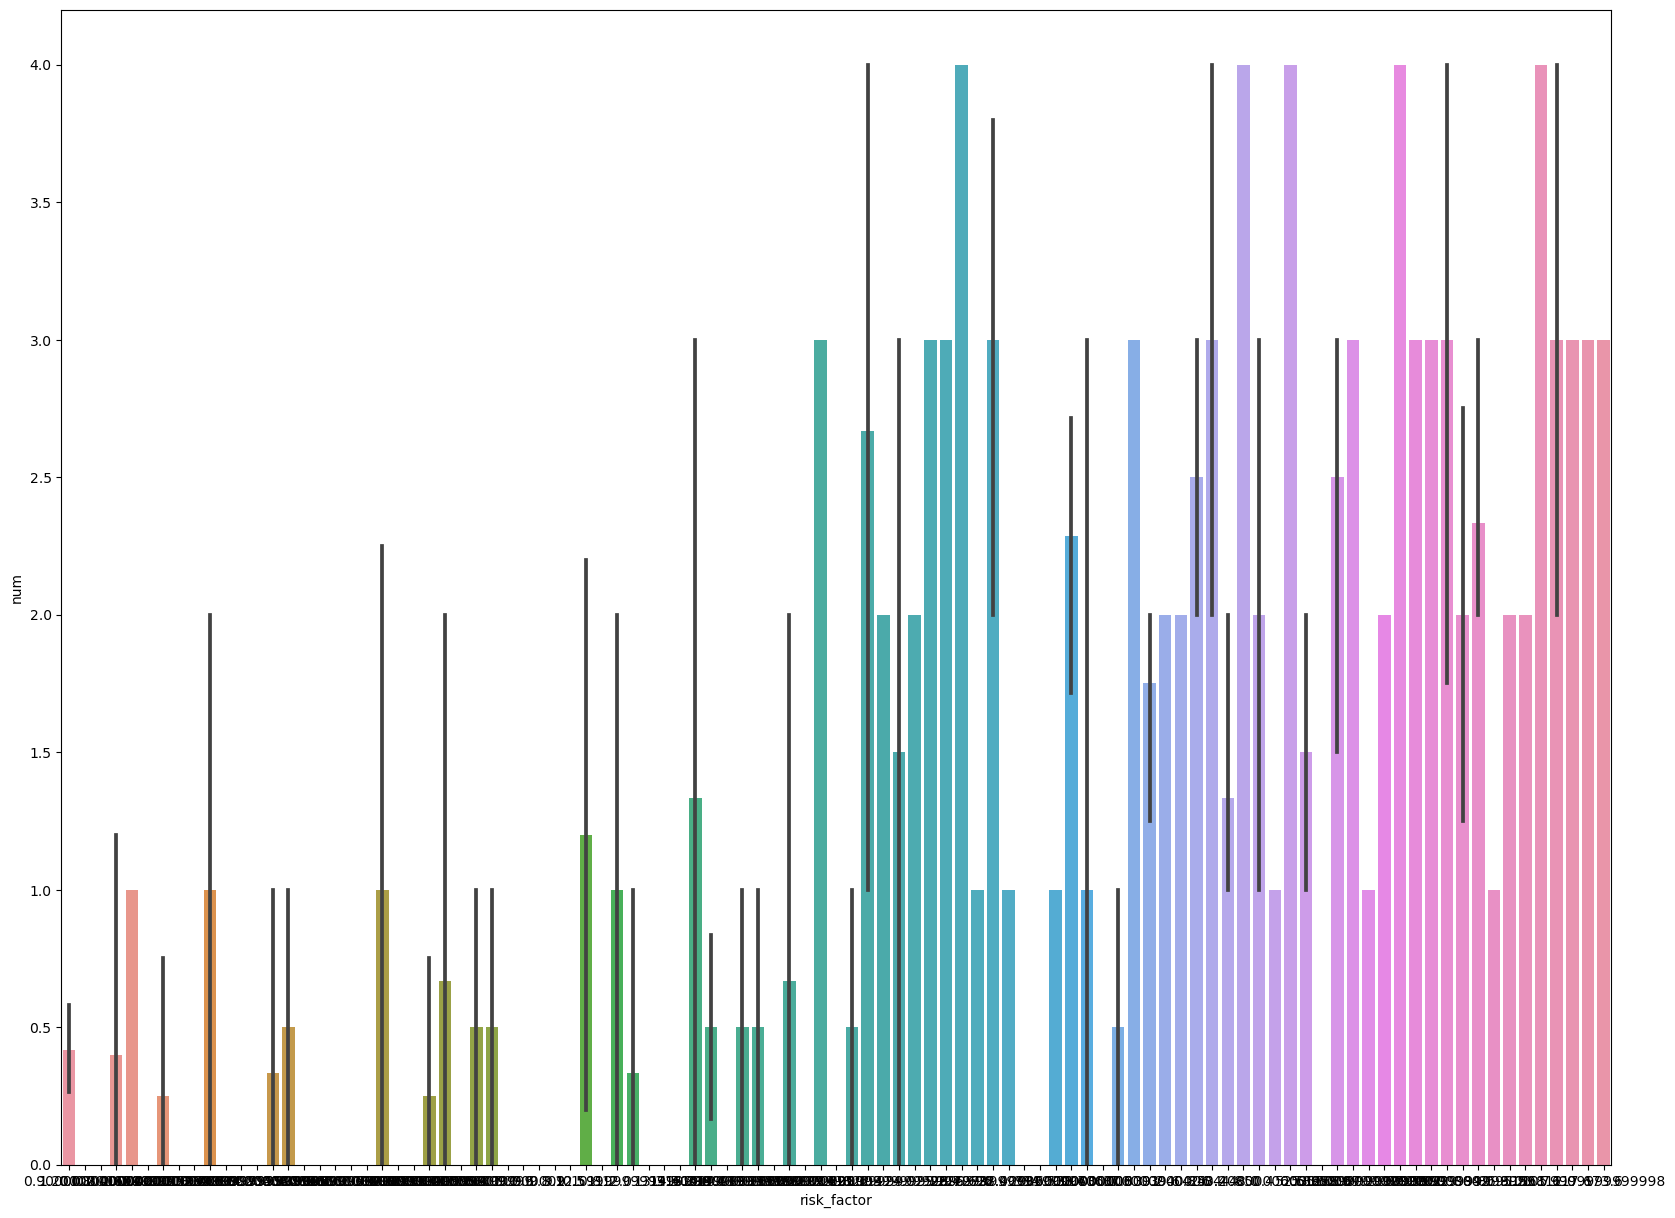

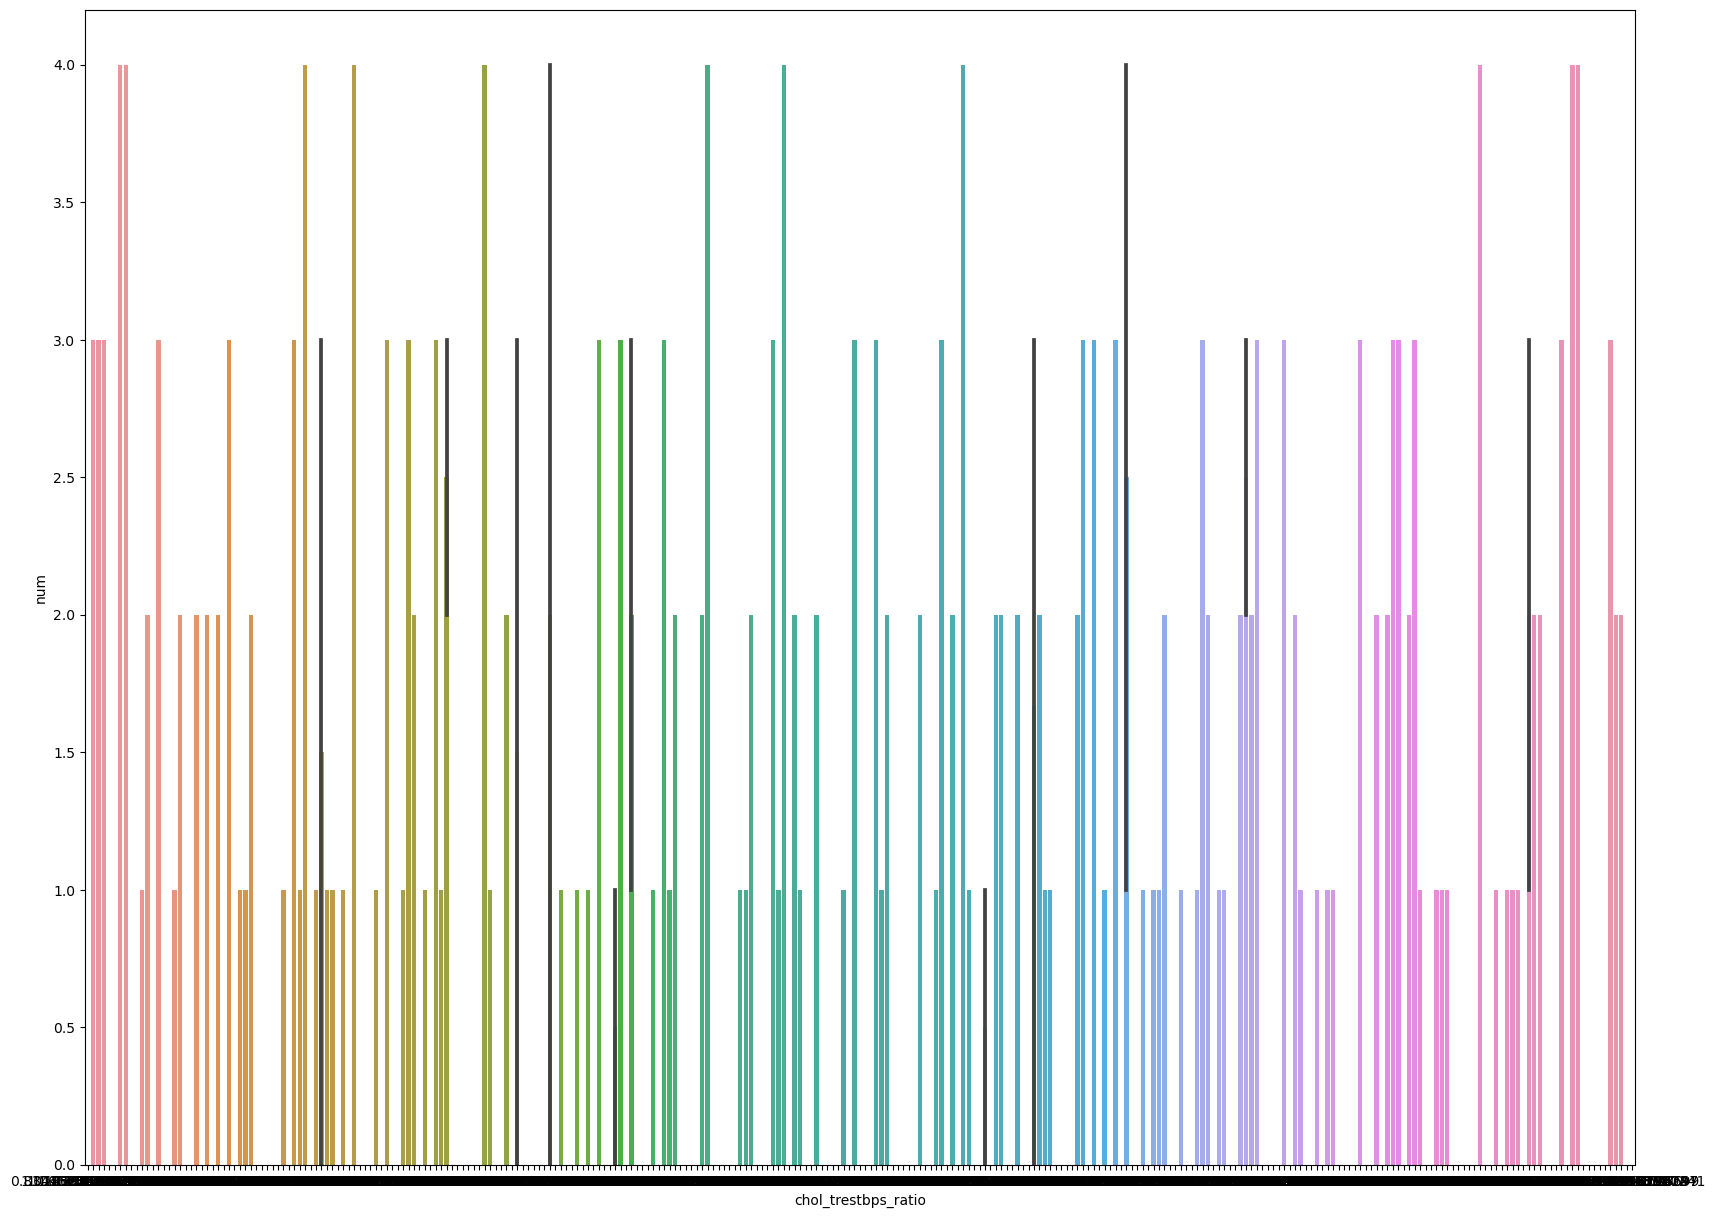

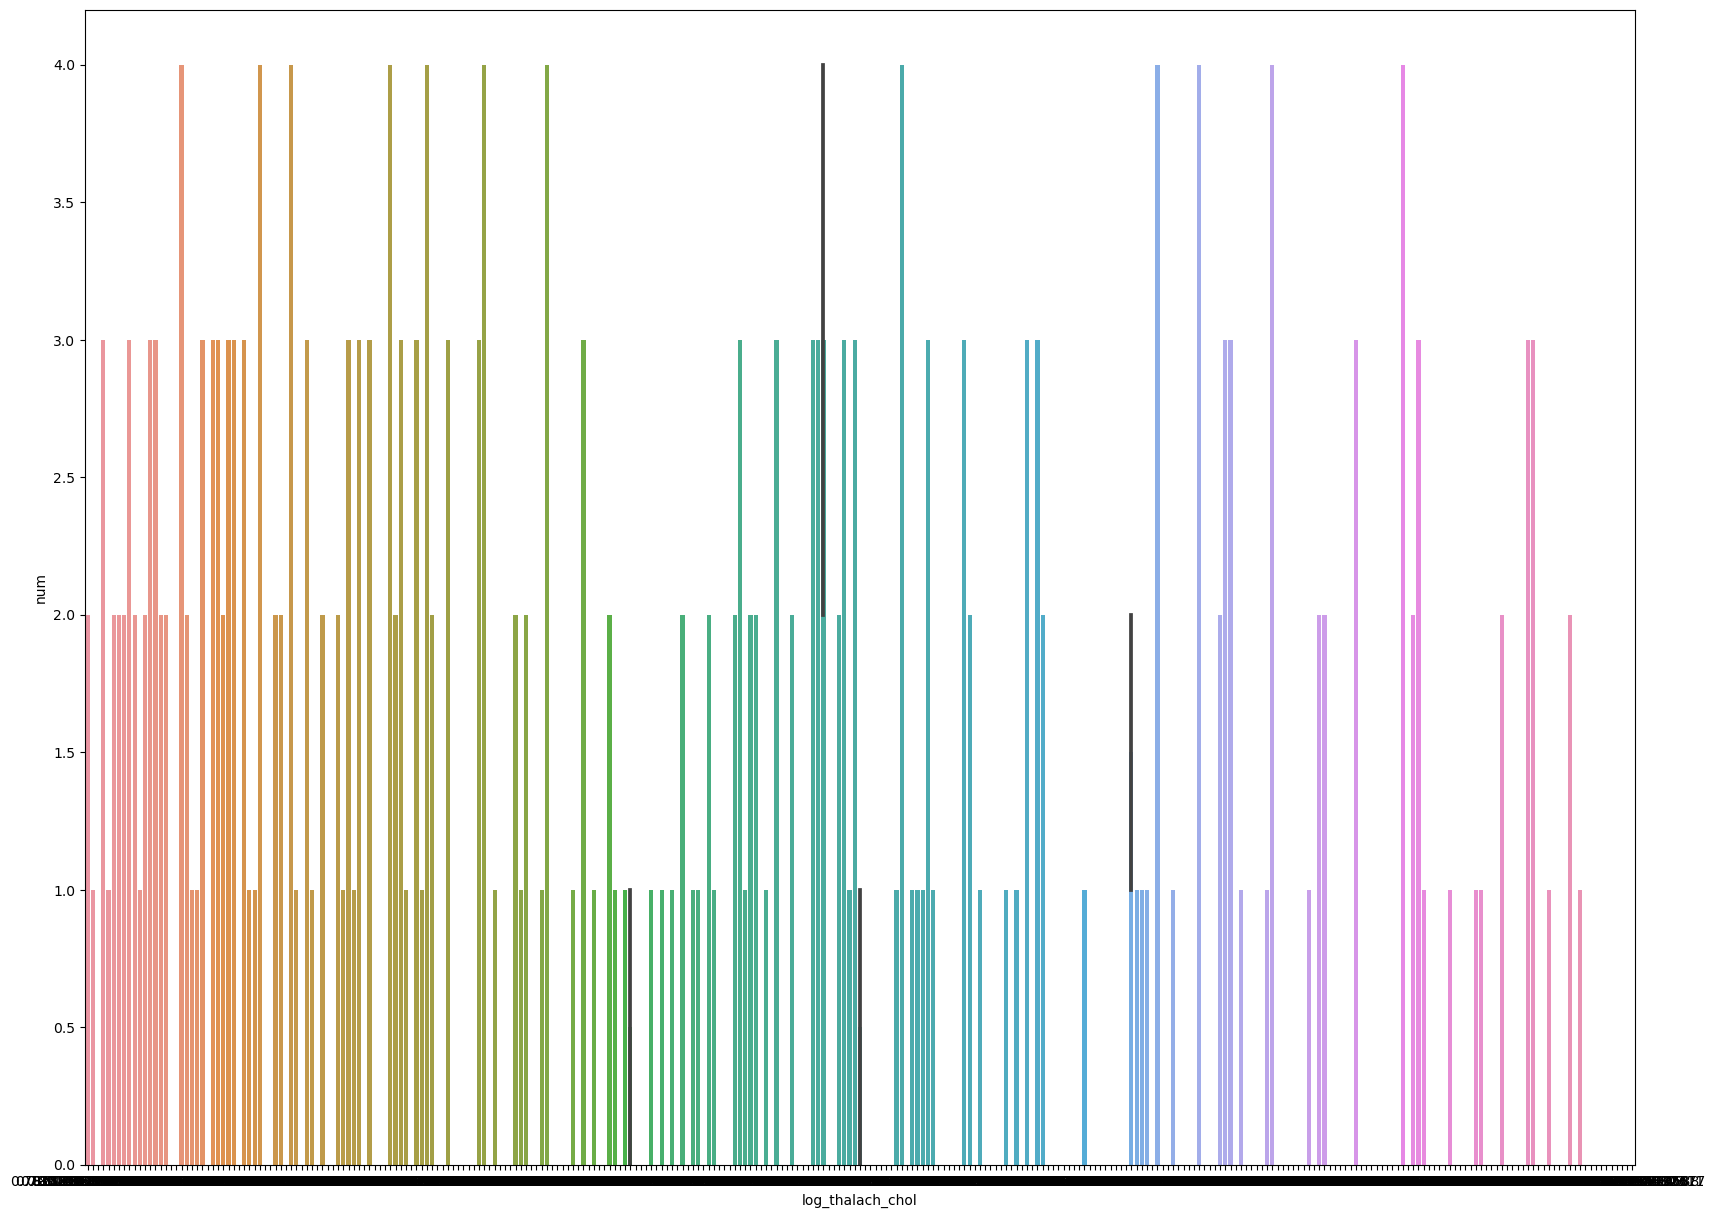

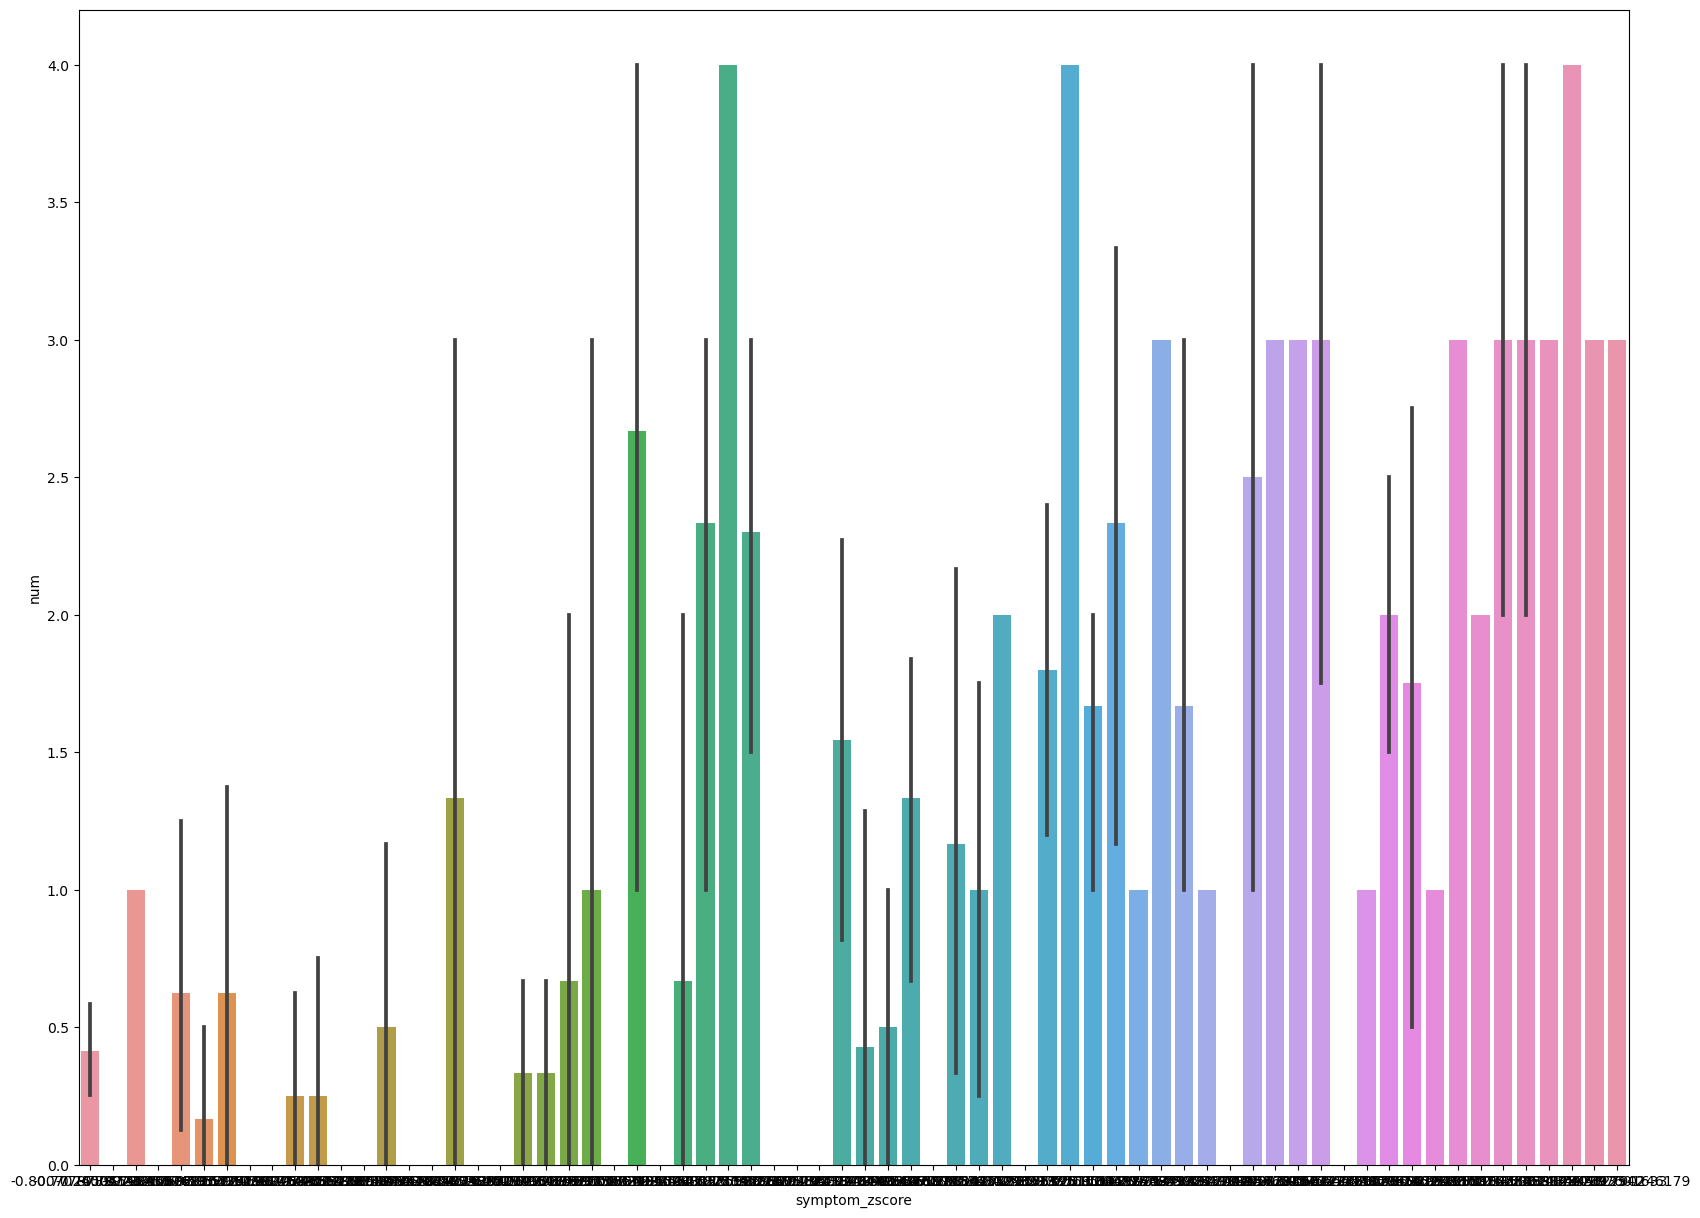

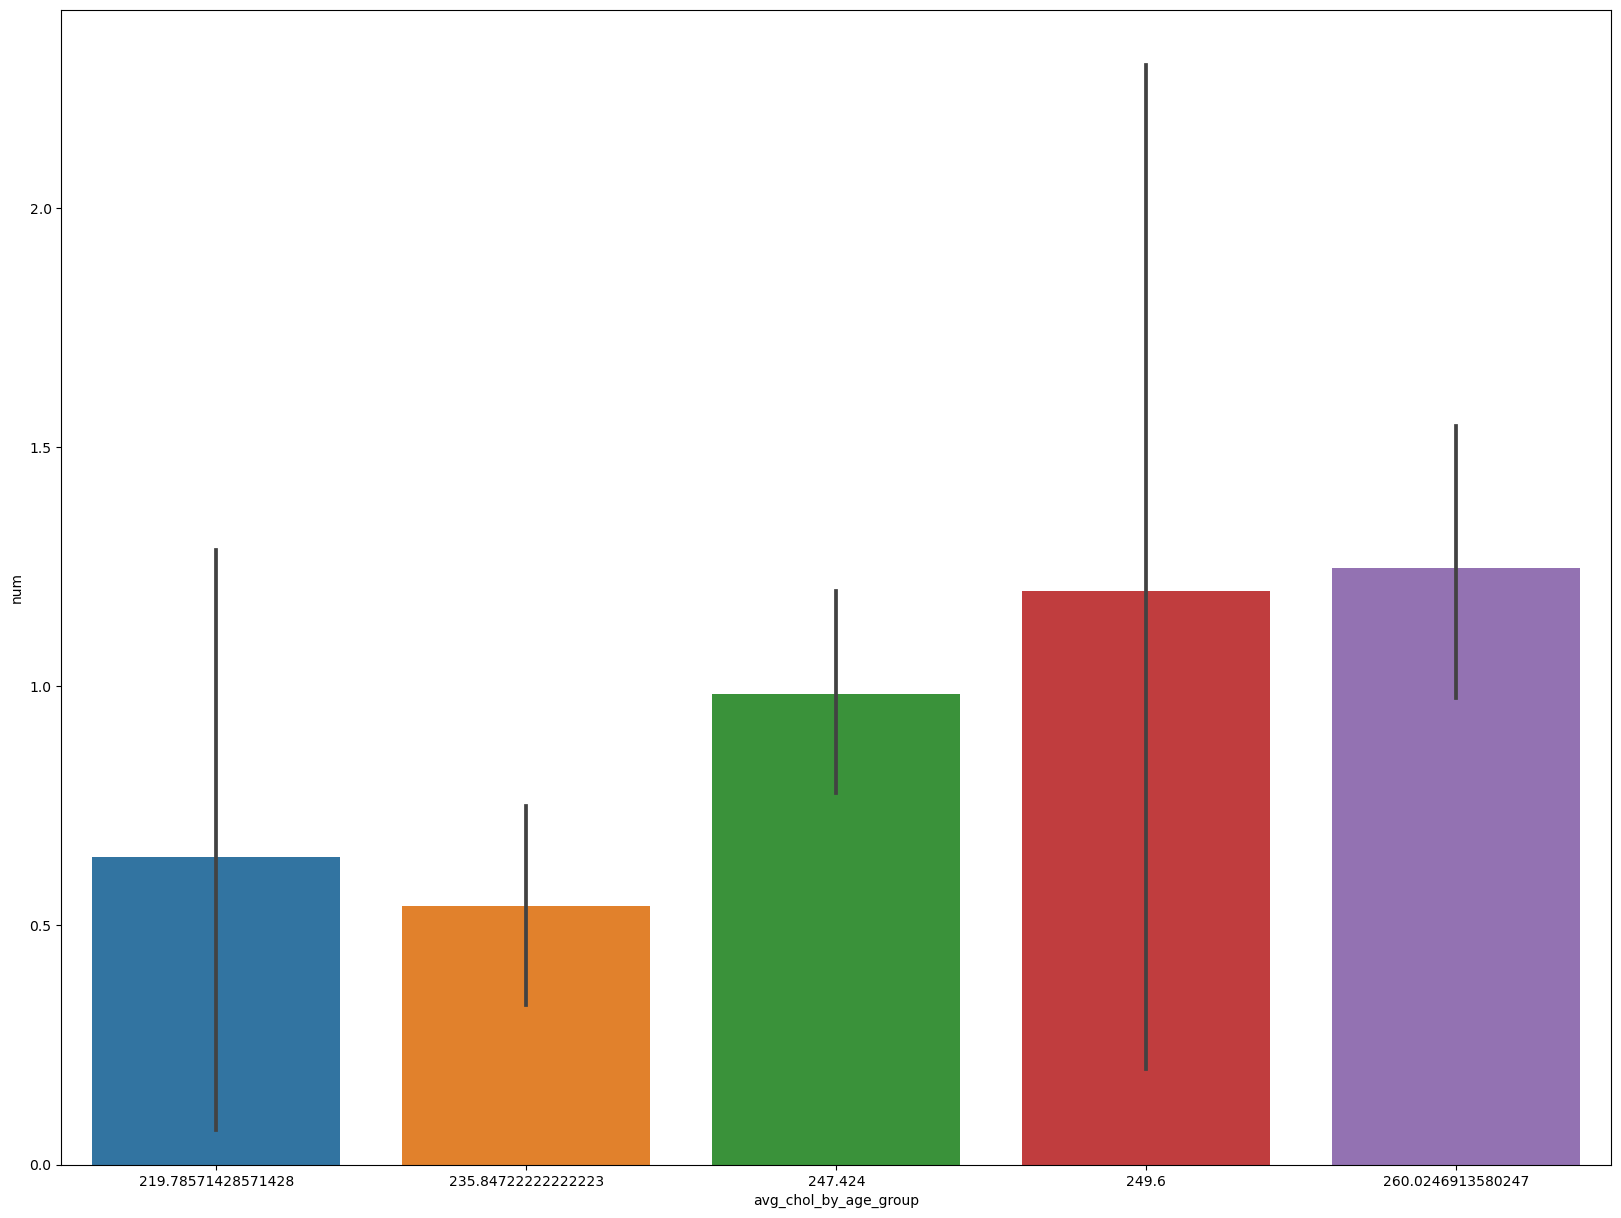

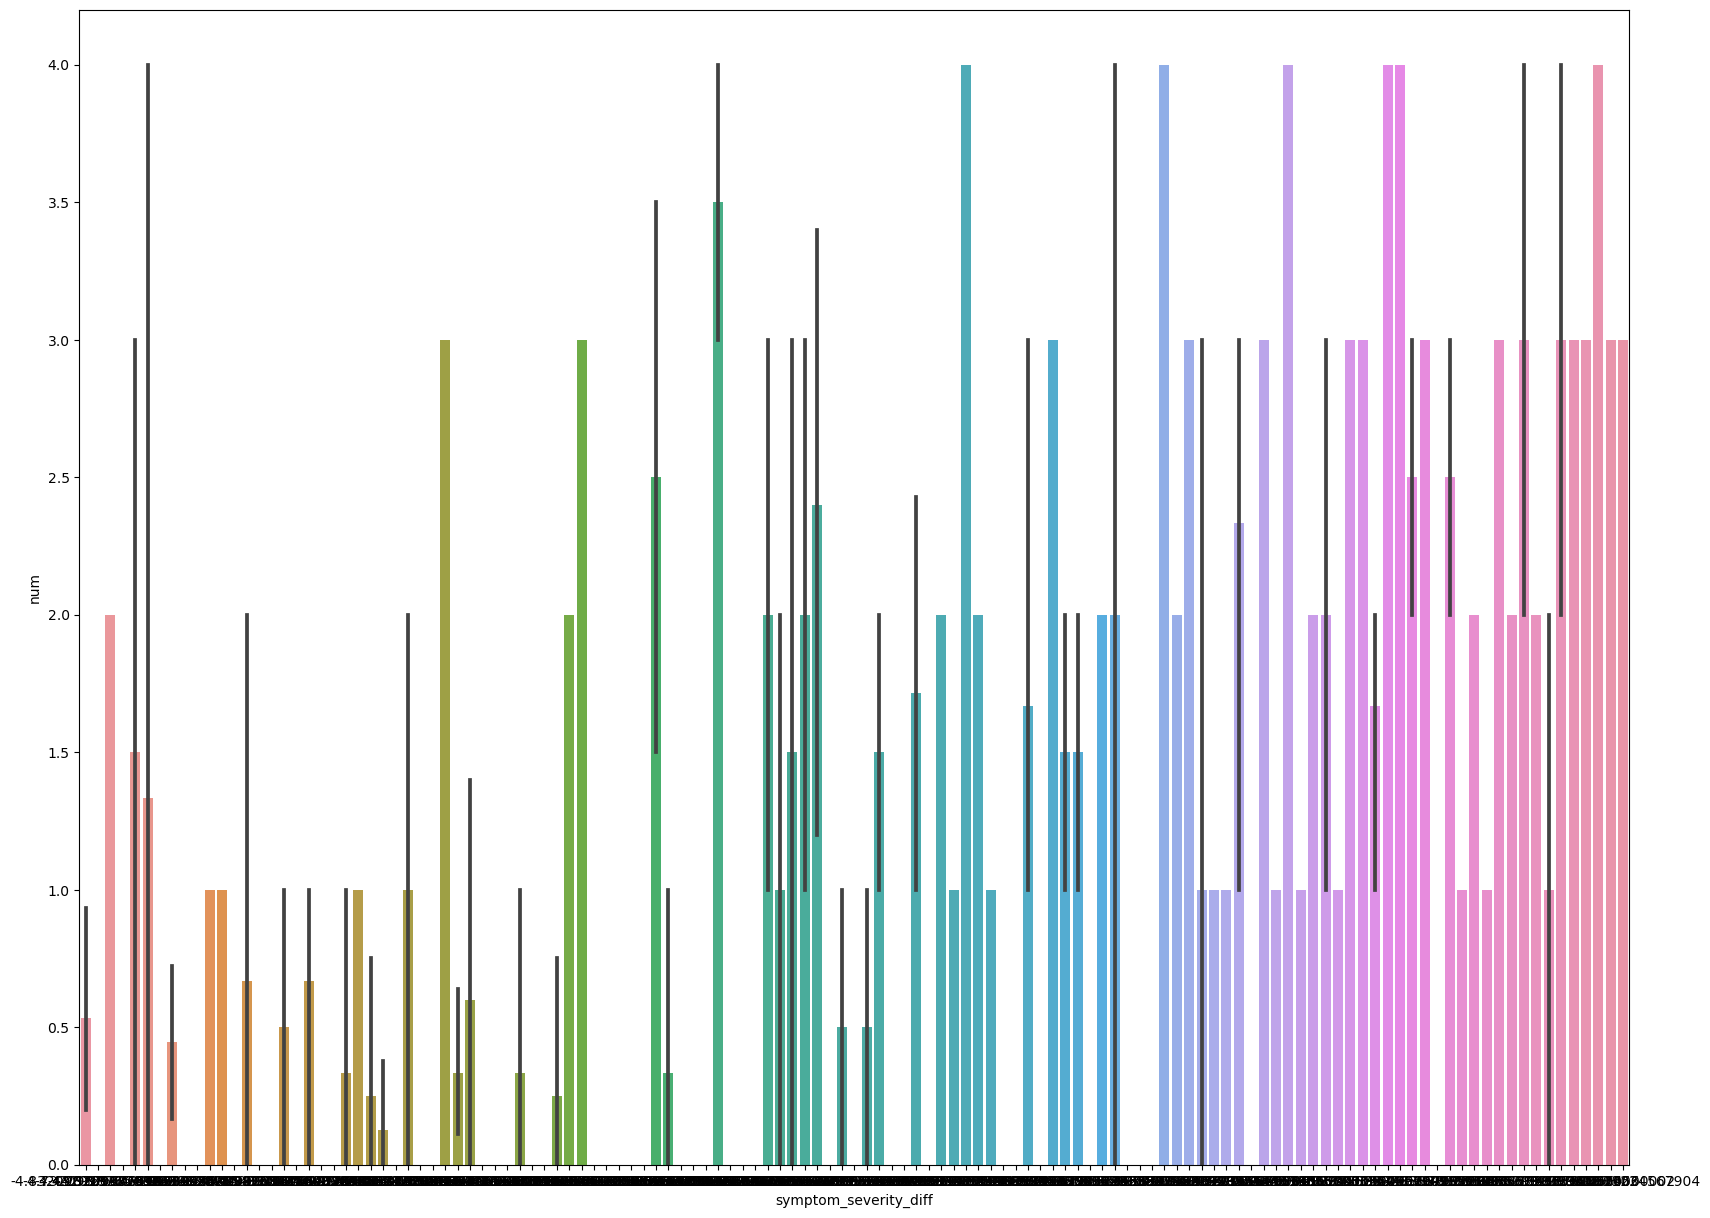

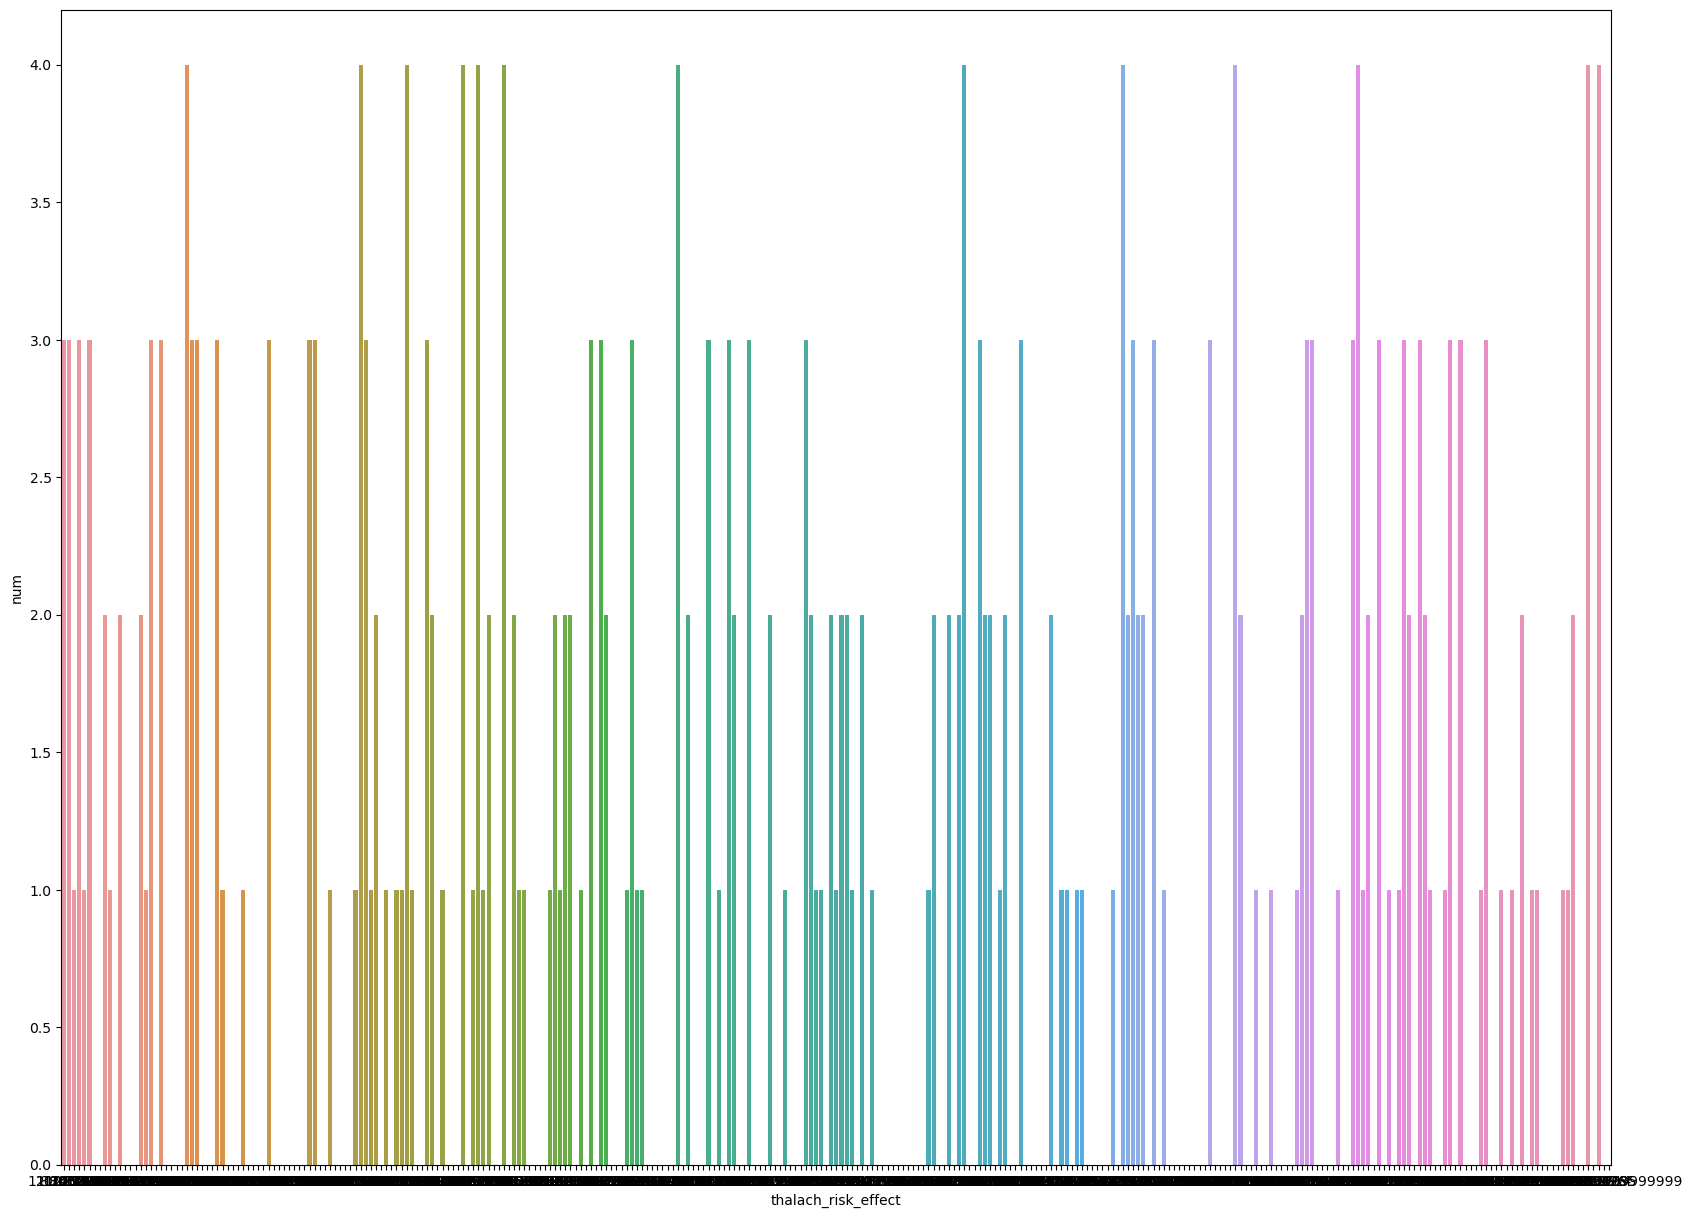

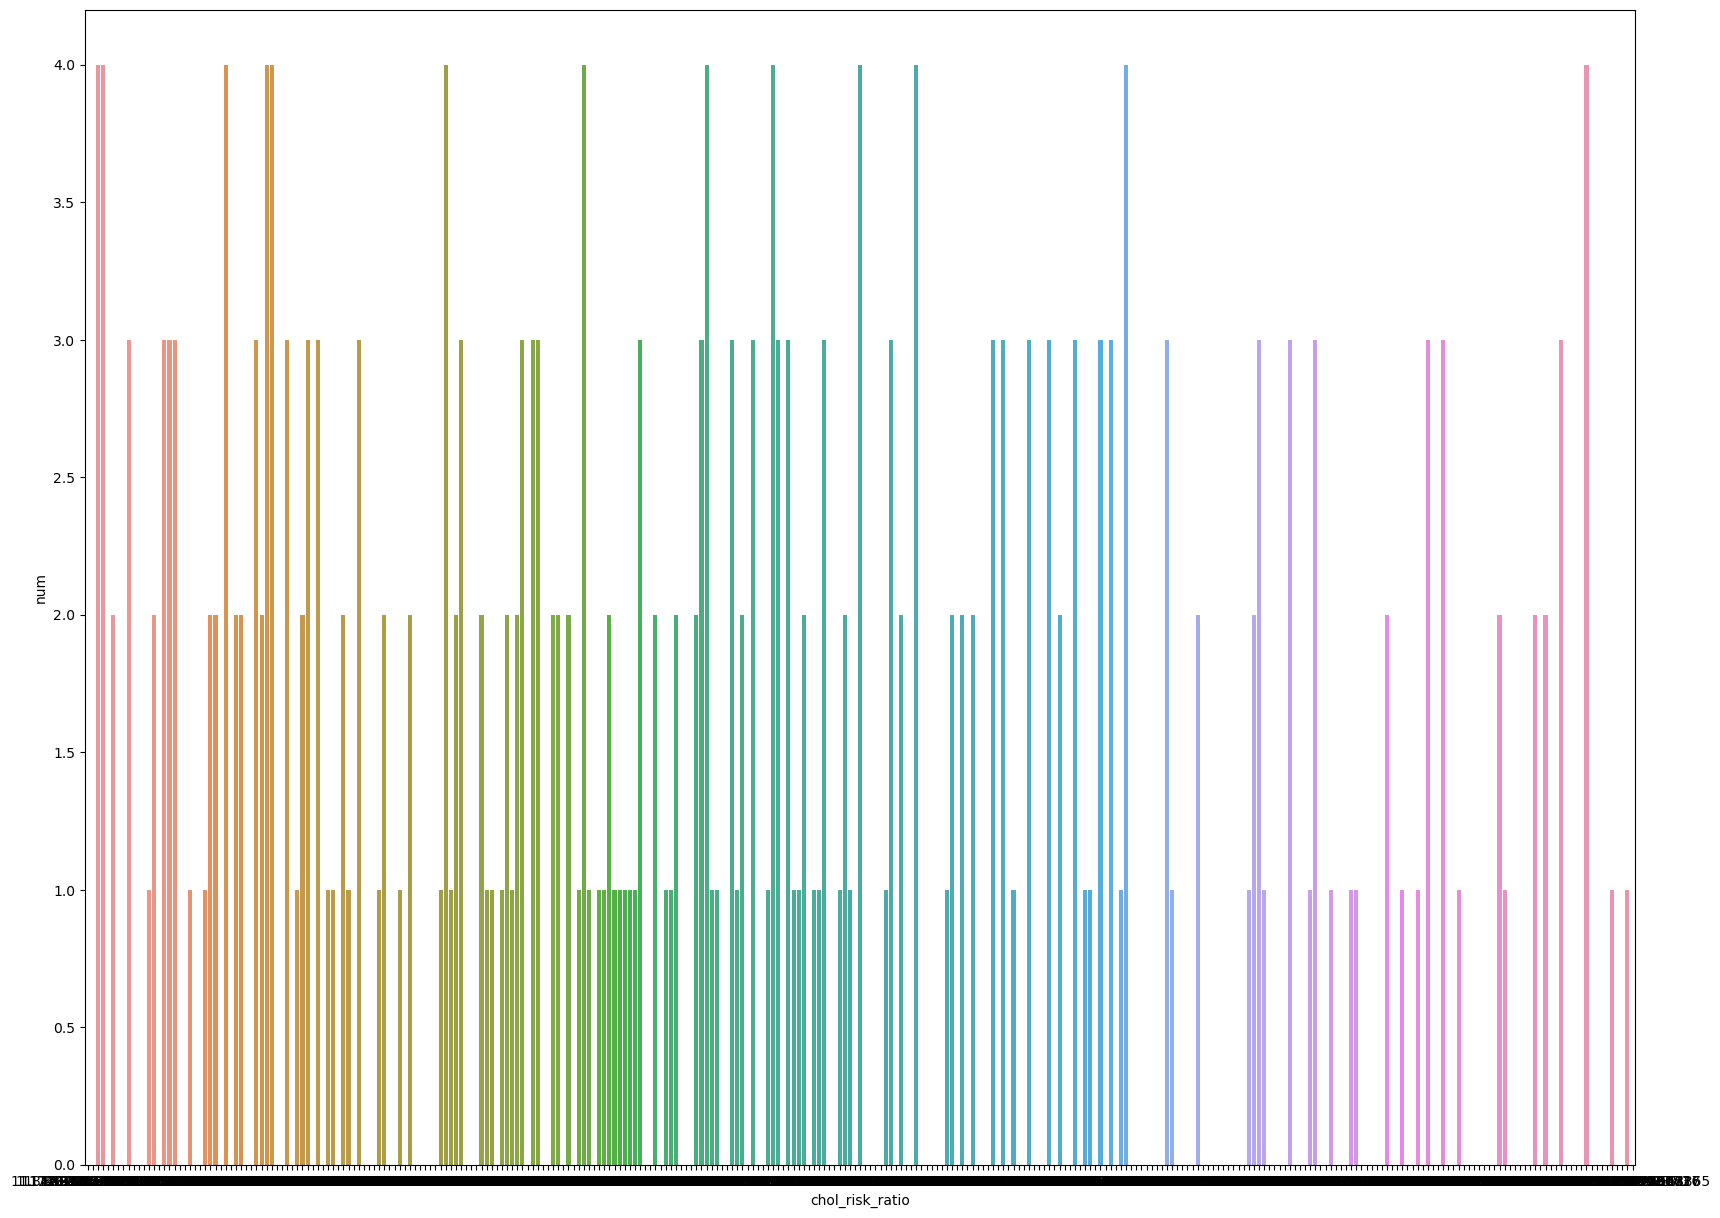

In [12]:
for col in float_64:
    plt.figure(figsize = (20,15))
    sns.barplot(x = col, y = 'num', data = df)
    plt.show()

In [13]:
binary_column = []
for col in num_cols:
    binary_cols = num_cols[col].unique()
    if set(binary_cols).issubset({0,1}):
        binary_column.append(col)
print('Binary Columns', binary_column)

Binary Columns ['sex', 'fbs', 'exang', 'missing_values']


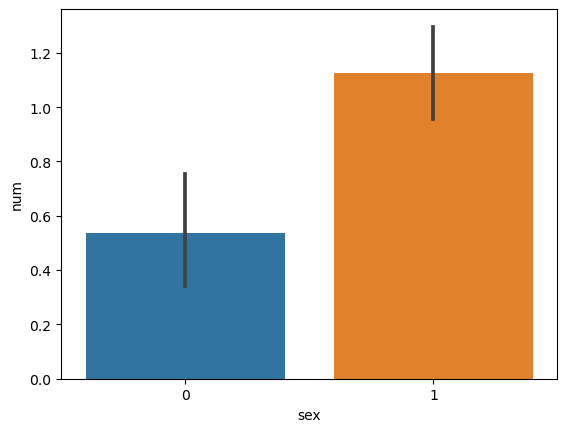

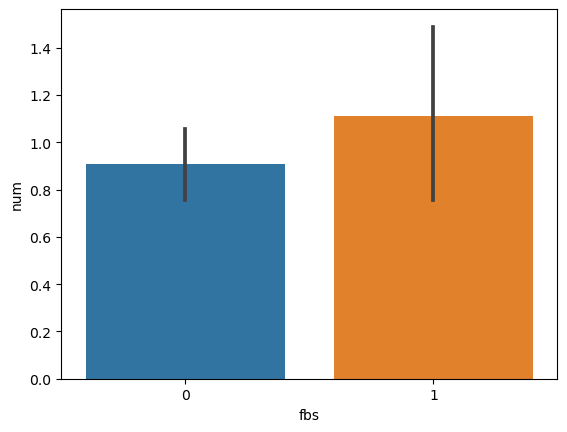

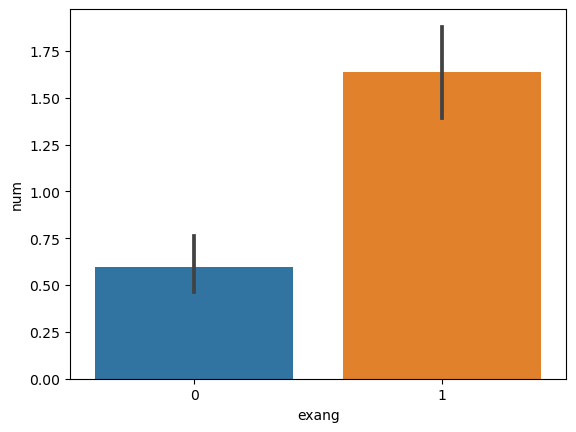

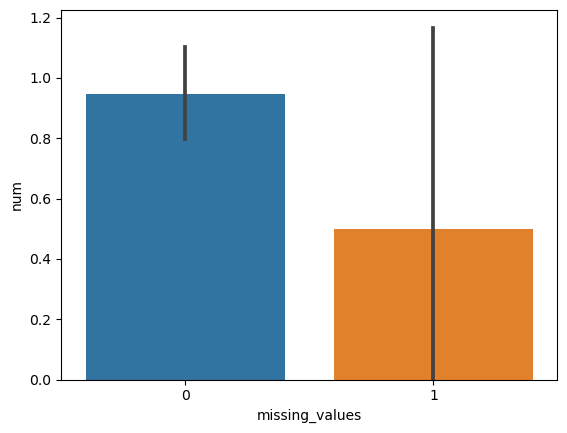

In [14]:
for col in binary_column:
    df1 = df.copy()
    sns.barplot(x = col, y = 'num', data = df1)
    
    plt.show()

In [15]:
#Finding all the unique values.


disc_values = [col for col in df.columns if df[col].nunique() <= 5]

unq_values = {col: df[col].unique() for col in disc_values}

for col, unique_values in unq_values.items():
    print(f"Unique columns in {col} is {unique_values}")
    
    '''
    df2 = df.copy()
    sns.barplot(x = col, y = 'num', data = df2)
    plt.show()
    '''
    

Unique columns in sex is [1 0]
Unique columns in cp is [1 4 3 2]
Unique columns in fbs is [1 0]
Unique columns in restecg is [2 0 1]
Unique columns in exang is [0 1]
Unique columns in slope is [3 2 1]
Unique columns in ca is [ 0.  3.  2.  1. nan]
Unique columns in thal is [ 6.  3.  7. nan]
Unique columns in num is [0 2 1 3 4]
Unique columns in age_group is ['60s' '30s' '40s' '50s' '70s' nan]
Unique columns in cholesterol_level is ['normal' 'high' 'low' nan]
Unique columns in bp_level is ['high' 'low' 'normal' nan]
Unique columns in missing_values is [0 1]
Unique columns in avg_chol_by_age_group is [260.02469136 219.78571429 235.84722222 247.424      249.6
          nan]


In [16]:
for col in num_cols:
    null_count = num_cols.isnull().sum()
null_count
    

age                      0
sex                      0
cp                       0
trestbps                 0
chol                     0
fbs                      0
restecg                  0
thalach                  0
exang                    0
oldpeak                  0
slope                    0
ca                       4
thal                     2
num                      0
risk_score               0
symptom_severity         0
log_chol                 0
log_trestbps             0
age_squared              0
chol_squared             0
age_thalach_ratio        0
risk_factor              2
missing_values           0
chol_trestbps_ratio      0
log_thalach_chol         0
symptom_zscore           0
avg_chol_by_age_group    1
thalach_chol_diff        0
symptom_severity_diff    1
age_chol_effect          0
thalach_risk_effect      0
age_trestbps_effect      0
chol_risk_ratio          0
dtype: int64

In [17]:
#Finding Missing Values
Null_values = num_cols.columns[num_cols.isnull().any()]
Null_values



Index(['ca', 'thal', 'risk_factor', 'avg_chol_by_age_group',
       'symptom_severity_diff'],
      dtype='object')

In [18]:
#Filling Missing Values in Numerical Values
for col in Null_values:
    df[col].fillna(df[col].mean(), inplace = True)
    


In [19]:
#Filling Missing Values in Categorical Values
for col in df:
    df[col].fillna('Uknown', inplace = True)
    


In [20]:
#Converting Categorical Values into Numerical Values
encoding = LabelEncoder()

for col in obj_files:
    df_encoded = pd.get_dummies(df, columns = obj_files.columns)
mapping = {'True': 1, 'No': 0}
convt = df_encoded.select_dtypes(include = 'bool')
df_encoded[convt.columns] = convt.astype(int)



In [21]:
df = df_encoded

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       303 non-null    int64  
 1   sex                       303 non-null    int64  
 2   cp                        303 non-null    int64  
 3   trestbps                  303 non-null    int64  
 4   chol                      303 non-null    int64  
 5   fbs                       303 non-null    int64  
 6   restecg                   303 non-null    int64  
 7   thalach                   303 non-null    int64  
 8   exang                     303 non-null    int64  
 9   oldpeak                   303 non-null    float64
 10  slope                     303 non-null    int64  
 11  ca                        303 non-null    float64
 12  thal                      303 non-null    float64
 13  num                       303 non-null    int64  
 14  risk_score

In [23]:
df.isnull().any()

age                         False
sex                         False
cp                          False
trestbps                    False
chol                        False
fbs                         False
restecg                     False
thalach                     False
exang                       False
oldpeak                     False
slope                       False
ca                          False
thal                        False
num                         False
risk_score                  False
symptom_severity            False
log_chol                    False
log_trestbps                False
age_squared                 False
chol_squared                False
age_thalach_ratio           False
risk_factor                 False
missing_values              False
chol_trestbps_ratio         False
log_thalach_chol            False
symptom_zscore              False
avg_chol_by_age_group       False
thalach_chol_diff           False
symptom_severity_diff       False
age_chol_effec

In [24]:
#Splitting Data
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,age_group_70s,age_group_Uknown,cholesterol_level_Uknown,cholesterol_level_high,cholesterol_level_low,cholesterol_level_normal,bp_level_Uknown,bp_level_high,bp_level_low,bp_level_normal
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,...,3.595262e-01,-1.622218e-01,0.016332,0.158205,-0.140566,-0.059999,-0.085265,0.281796,-0.170836,-0.060486
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,...,-7.122676e-02,3.948651e-02,0.039487,-0.132147,0.032403,0.110050,-0.031427,-0.032071,0.036788,-0.002576
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,...,-1.125866e-02,-6.954258e-02,-0.009510,0.109634,0.011573,-0.124166,-0.013472,-0.028824,-0.022632,0.047112
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,...,4.321593e-02,-5.533950e-03,0.059966,0.136425,-0.086112,-0.084737,-0.174850,0.760616,-0.685258,0.036331
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,...,1.038921e-02,-4.752647e-02,-0.134357,0.755395,-0.557323,-0.349569,-0.053132,0.041185,-0.107048,0.074145
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,...,-2.520388e-02,-2.403217e-02,0.137784,0.026464,-0.032194,-0.019687,-0.034043,0.116874,-0.162217,0.059716
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,...,2.043973e-02,5.850360e-02,-0.057356,0.196061,-0.103908,-0.119817,-0.081249,0.109902,-0.136497,0.049223
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,...,-1.545686e-01,1.320153e-01,0.058943,-0.078126,-0.047789,0.113020,0.060296,-0.116966,-0.012364,0.098550
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,...,2.885935e-02,-4.008658e-02,-0.040087,0.103252,-0.038412,-0.074635,0.030113,0.041522,-0.076439,0.031861
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,...,1.281322e-02,-5.160859e-02,-0.041680,0.003873,0.038351,-0.028991,-0.073107,0.150966,-0.083234,-0.035662


<Axes: >

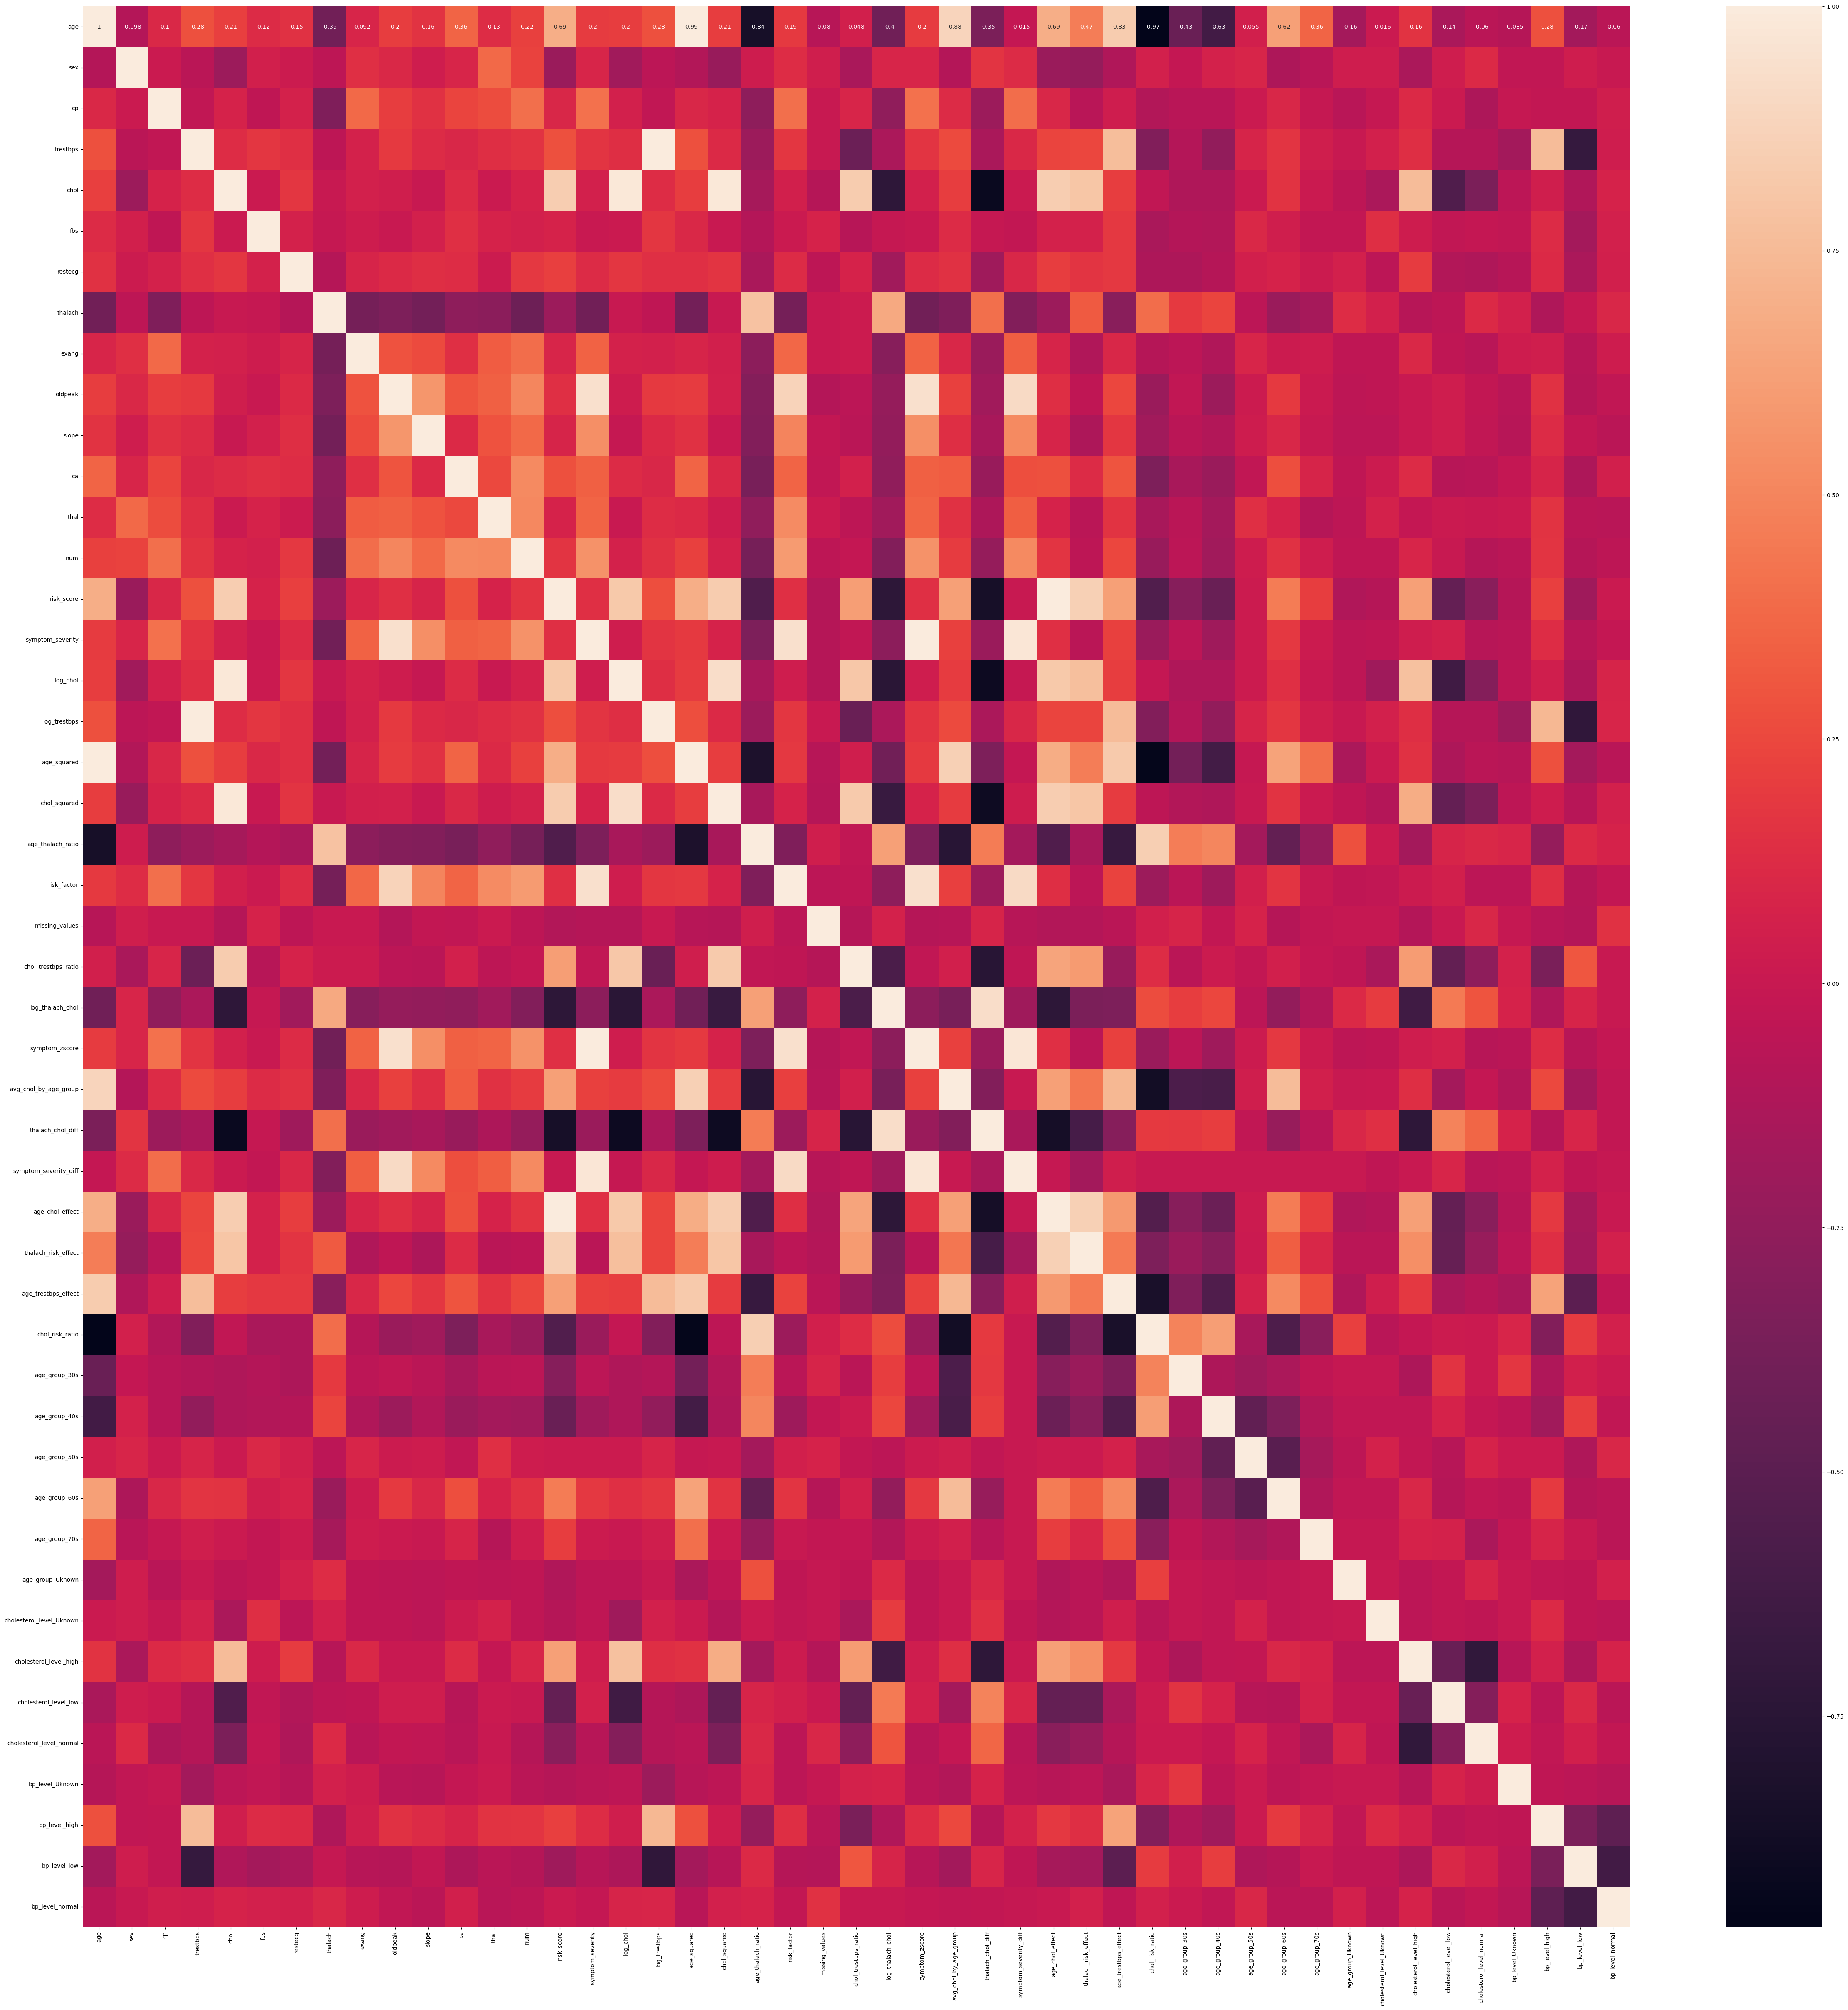

In [25]:
plt.figure(figsize = (60,60))
sns.heatmap(df.corr(), annot = True)

In [26]:
#Finding correlation between each variable to variable 'num'
corr = df.corr()
corr['num'].sort_values(ascending = False)


num                         1.000000
risk_factor                 0.596165
symptom_zscore              0.556444
symptom_severity            0.556444
symptom_severity_diff       0.519035
ca                          0.517390
thal                        0.508799
oldpeak                     0.504092
cp                          0.407075
exang                       0.397057
slope                       0.377957
age_trestbps_effect         0.240038
sex                         0.224469
age                         0.222853
age_squared                 0.217533
avg_chol_by_age_group       0.197062
restecg                     0.183696
bp_level_high               0.170399
risk_score                  0.169438
age_chol_effect             0.164468
trestbps                    0.157754
log_trestbps                0.154193
age_group_60s               0.152484
cholesterol_level_high      0.088967
chol                        0.070909
log_chol                    0.067278
chol_squared                0.064892
f

In [27]:
#Splitting the data
x = df.drop('num', axis = 1)
y = df['num'].apply(lambda x: 1 if x>0 else 0)


In [28]:
#FeatureEngineering data to balance all independent features.
scaling = StandardScaler()
scaling_df = scaling.fit_transform(x)
scaling_df = pd.DataFrame(scaling_df, columns = x.columns)
scaling_df 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,age_group_70s,age_group_Uknown,cholesterol_level_Uknown,cholesterol_level_high,cholesterol_level_low,cholesterol_level_normal,bp_level_Uknown,bp_level_high,bp_level_low,bp_level_normal
0,0.948726,0.686202,-2.251775,0.757525,-0.264900,2.394438,1.016684,0.017197,-0.696631,1.087338,...,-0.184742,-0.057544,-0.057544,-1.003306,-0.439219,1.414214,-0.081514,1.894969,-0.675819,-0.926766
1,1.392002,0.686202,0.877985,1.611220,0.760415,-0.417635,1.016684,-1.821905,1.435481,0.397182,...,-0.184742,-0.057544,-0.057544,0.996705,-0.439219,-0.707107,-0.081514,1.894969,-0.675819,-0.926766
2,1.392002,0.686202,0.877985,-0.665300,-0.342283,-0.417635,1.016684,-0.902354,1.435481,1.346147,...,-0.184742,-0.057544,-0.057544,-1.003306,-0.439219,1.414214,-0.081514,-0.527713,1.479687,-0.926766
3,-1.932564,0.686202,-0.165268,-0.096170,0.063974,-0.417635,-0.996749,1.637359,-0.696631,2.122573,...,-0.184742,-0.057544,-0.057544,0.996705,-0.439219,-0.707107,-0.081514,-0.527713,-0.675819,1.079021
4,-1.489288,-1.457296,-1.208521,-0.096170,-0.825922,-0.417635,1.016684,0.980537,-0.696631,0.310912,...,-0.184742,-0.057544,-0.057544,-1.003306,-0.439219,1.414214,-0.081514,-0.527713,-0.675819,1.079021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-1.046013,0.686202,-2.251775,-1.234430,0.334813,-0.417635,-0.996749,-0.770990,-0.696631,0.138373,...,-0.184742,-0.057544,-0.057544,0.996705,-0.439219,-0.707107,-0.081514,-0.527713,1.479687,-0.926766
299,1.502821,0.686202,0.877985,0.700612,-1.038723,2.394438,-0.996749,-0.376896,-0.696631,2.036303,...,-0.184742,-0.057544,-0.057544,-1.003306,2.276768,-0.707107,-0.081514,1.894969,-0.675819,-0.926766
300,0.283813,0.686202,0.877985,-0.096170,-2.238149,-0.417635,-0.996749,-1.515388,1.435481,0.138373,...,-0.184742,-0.057544,-0.057544,-1.003306,2.276768,-0.707107,-0.081514,-0.527713,-0.675819,1.079021
301,0.283813,-1.457296,-1.208521,-0.096170,-0.206864,-0.417635,1.016684,1.068113,-0.696631,-0.896862,...,-0.184742,-0.057544,-0.057544,-1.003306,-0.439219,1.414214,-0.081514,-0.527713,-0.675819,1.079021


In [29]:
#Splitting data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaling_df, y, test_size = 0.2, random_state = 42)



In [30]:
#Using LogisticRegression to train the model
regressor = LogisticRegression()
model = regressor.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [31]:
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0])

In [32]:
y_test

179    0
228    1
111    1
246    1
60     1
      ..
249    0
104    1
300    1
193    1
184    1
Name: num, Length: 61, dtype: int64

TypeError: DataFrame.insert() missing 2 required positional arguments: 'column' and 'value'

In [33]:
accuracy_score(y_pred, y_test)

0.8524590163934426

In [34]:
confusion_matrix(y_pred, y_test)

array([[25,  5],
       [ 4, 27]])

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [60]:
comp = {'y_test': y_test, 'y_pred': y_pred}
pd.DataFrame(comp)

,y_test,y_pred
179,0,1
228,1,1
111,1,1
246,1,0
60,1,1
...,...,...
249,0,0
104,1,1
300,1,1
193,1,1
